# Основные этапы проекта
<ul>
  <li>1  Описание проекта "Восстановление золота из руды"</li>
  <ul>
  <li>1.1  Описание данных</li>
    <ul>
      <li>1.1.1  Расчёт эффективности</li>
      <li>1.1.2  Метрика качества</li>
    </ul>
  </ul>
  <li>2  Подготовка данных</li>
  <ul>
    <li>2.1  Работа с файлами данных</li>
    <li>2.2  Смотрим распределение данных</li>
    <li>2.3  Проверим, что эффективность обогащения рассчитана правильно.</li>
    <li>2.4  Проанализируем признаки, недоступные в тестовой выборке.</li>
    <li>2.5  Предобработка данных</li>
      <ul>
        <li>2.5.1  Добавим недостающие целевые признаки в тестовую выборку</li>
        <li>2.5.2  Обработка пропусков</li>
        <li>2.5.3  Проверка на дубликаты</li>
      </ul>
    <li>2.6  Выводы по подготовке данных</li>
  </ul>
  <li>3  Исследовательский анализ данных</li>
  <ul><li>3.1  Концентрация металлов (Au, Ag, Pb) на различных этапах очистки</li>
  <li>3.2  Распределения размеров гранул сырья</li>
  <li>3.3  Суммарная концентрация всех веществ на разных стадиях</li>
  <li>3.4  Подготовим датафреймы для прогнозирования features, target</li>
  <li>3.5  Выводы по анализу данных</li>
  </ul>
  <li>4  Построение и обучение модели</li>
  <ul>
  <li>4.1  Напишем функцию для вычисления итоговой sMAPE.</li>
  <li>4.2  Обучение различных моделей и оценка их качества</li>
  <li>4.3  Дерево решений</li>
  <li>4.4  Случайный лес</li>
  <li>4.5  Линейная регрессия</li>
  <li>4.6  Выводы по построению и обучению модели</li>
  </ul>
  <li>Чек-лист готовности проекта</li>
</ul>

# Проект "Восстановление золота из руды"

## Описание проекта

Проект представляет собой реальную задачу Data Science из золотодобывающей отрасли.<br>
Необходимо подготовить прототип модели машинного обучения для компаниии «Цифра» (https://www.zyfra.com/ru).<br><br>
Компания разрабатывает решения для эффективной работы промышленных предприятий.<br>
Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды.<br>
Имеются данные с параметрами добычи и очистки. Модель должна помогать оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

### Описание данных
Технологический процесс
<ul>
<li><b>Rougher feed</b> — исходное сырье</li>
<li><b>Rougher additions</b> (или <b>reagent additions</b>) — флотационные реагенты: Xanthate, Sulphate, Depressant</li>
<ul>
	<li><b>Xanthate **</b>— ксантогенат (промотер, или активатор флотации);</li>
	<li><b>Sulphate</b> — сульфат (на данном производстве сульфид натрия);</li>
	<li><b>Depressant</b> — депрессант (силикат натрия).</li>
	</ul>
<li><b>Rougher process</b> (англ. «грубый процесс») — флотация</li>
<li><b>Rougher tails</b> — отвальные хвосты</li>
<li><b>Float banks</b> — флотационная установка</li>
<li><b>Cleaner process</b> — очистка</li>
<li><b>Rougher Au</b> — черновой концентрат золота</li>
<li><b>Final Au</b> — финальный концентрат золота</li>
</ul>

Параметры этапов
<ul>
<li><b>air amount</b> — объём воздуха</li>
<li><b>fluid levels</b> — уровень жидкости</li>
<li><b>feed size</b> — размер гранул сырья</li>
<li><b>feed rate</b> — скорость подачи</li>
</ul>

Наименование признаков должно быть такое: `[этап].[тип_параметра].[название_параметра]`<br>
Пример: <b>rougher</b>.<b>input</b>.<b>feed_ag</b>

Возможные значения для блока `[этап]`:
<ul>
<li><b>rougher</b> — флотация</li>
<li><b>primary_cleaner</b> — первичная очистка</li>
<li><b>secondary_cleaner</b> — вторичная очистка</li>
<li><b>final</b> — финальные характеристики</li>
</ul>

Возможные значения для блока `[тип_параметра]`:
<ul>
<li><b>input</b> — параметры сырья</li>
<li><b>output</b> — параметры продукта</li>
<li><b>state</b> — параметры, характеризующие текущее состояние этапа</li>
<li><b>calculation</b> — расчётные характеристики</li>
</ul>

#### Расчёт эффективности
Необходимо смоделировать процесс восстановления золота из золотосодержащей руды.<br>
Эффективность обогащения рассчитывается по формуле:<br>

$Recovery= \frac {C \times (F - T)}{F \times (C - T)} \times 100\% $

<ul>
<li>C — доля золота в концентрате после флотации/очистки;</li>
<li>F — доля золота в сырье/концентрате до флотации/очистки;</li>
<li>T — доля золота в отвальных хвостах после флотации/очистки.</li>
</ul>
<p>Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Важен не только финальный продукт, но и черновой концентрат.</p>

#### Метрика качества
Для решения задачи введена новая метрика качества — `sMAPE`` (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).<br>
Она похожа на MAE, но выражается не в абсолютных величинах, а в относительных.</br>
(Почему симметричная? Она одинаково учитывает масштаб и целевого признака, и предсказания.)

<p>Метрика sMAPE вычисляется так:<br>

$sMAPE= \frac{1}{N} \sum_{i=1}^{N} \frac {|y_i-\hat{y_i}|}{(|y_i|+|\hat{y_i}|)/2} \times 100\% $

</p>

<p>Обозначения</p>

<style>
ul li {
,display: block;
,height: 42px;
}
ul li img {
,vertical-align: middle;
}
</style>

<ul>

$y_i$ - значение целевого признака для объекта с порядковым номером i в выборке, на которой измеряется качество.

</li>

$\hat{y_i}$ - значение предсказания для объекта с порядковым номером i, например, в тестовой выборке.

</li>

${N}$ - количество объектов в выборке.

</li>

$\sum_{i=1}^{N}$  - суммирование по всем объектам выборки (i меняется от 1 до N).

</li>
</ul>

Нужно спрогнозировать сразу две величины:
<ul>
<li>1. эффективность обогащения чернового концентрата `rougher`.`output`.`recovery`;</li>
<li>2. эффективность обогащения финального концентрата `final`.`output`.`recovery`.</li>
</ul>
Итоговая метрика складывается из двух величин:<br>

$Итоговое\hspace{0.2cm}sMAPE = 25\% \times sMAPE(rougher) + 75\% \times sMAPE(final)$

### Инструменты библиотеки и техники
Python, pandas, numpy, matplotlib, seaborn, sklearn, предобработка данных, исследовательский анализ данных

## Подготовка данных

In [1]:
# импорт пакетов
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import *
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.dummy import DummyRegressor
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.model_selection import train_test_split

from scipy.stats import ttest_ind

# интегрировать графические элементы непосредственно в код
%matplotlib inline
from matplotlib.pylab import RandomState
from collections import namedtuple
import time as time
from tqdm import tqdm as tqdm

import warnings
warnings.filterwarnings('ignore')

import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [2]:
RANDOM_FIX_NUMBER = 12345

TARGETS = ['rougher.output.recovery', 'final.output.recovery']

METALS = ['au', 'ag', 'pb']

CONCENTRATE_METRICS = [
    'rougher.input.feed',
    'rougher.output.concentrate',
    'primary_cleaner.output.concentrate',
    'final.output.concentrate',
]

CONCENTRATE_METRICS_DSC = {
    'rougher.input.feed': 'Сырье',
    'rougher.output.concentrate': 'Концентрация после флотации',
    'primary_cleaner.output.concentrate': 'Концентрация после первичной очистки',
    'final.output.concentrate': 'Финальная концетрация металла',
}

In [3]:
# Функции для изучения данных
  
def read_dataset(file_path, index_col, sep=','):
    """
    Чтение датафрейма из файла
    """
    try:
        df = pd.read_csv('datasets/' + file_path, index_col=index_col, sep=sep)
    except:
        df = pd.read_csv('https://code.s3.yandex.net/datasets/' + file_path, index_col=index_col, sep=sep)
    return df

def print_df(df):
    '''
    Просмотр датафрейма
    '''
    with pd.option_context('display.max_rows', None):
        display(df)

def analyze_df(df):
    '''
    Анализ датафрейма
    '''
    rows_count, columns_count = df.shape
    print('Количество стобцов:', columns_count)
    print('Количество строк:', rows_count)
    display(df.head(5))
    display(df.describe())
    df.info()

def analis_colums(df):
    '''
    Отображение списков числовых и нечисловых колонок
    '''
    print('Список числовых колонок')
    df_numeric = df.select_dtypes(include=[np.number])    
    numeric_cols = df_numeric.columns.values
    display(numeric_cols)

    print('Список нечисловых колонок')
    df_non_numeric = df.select_dtypes(exclude=[np.number])
    non_numeric_cols = df_non_numeric.columns.values
    display(non_numeric_cols)

    return numeric_cols, non_numeric_cols

### Работа с файлами данных

Откроем датасеты с данными и проанализируем их.

In [4]:
df_train = read_dataset('gold_recovery_train_new.csv', 'date')
analyze_df(df_train)

Количество стобцов: 86
Количество строк: 14149


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

In [5]:
df_test = read_dataset('gold_recovery_test_new.csv', 'date')
analyze_df(df_test)

Количество стобцов: 52
Количество строк: 5290


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

In [6]:
df_full = read_dataset('gold_recovery_full_new.csv', 'date')
analyze_df(df_full)

Количество стобцов: 86
Количество строк: 19439


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

In [7]:
numeric_cols, non_numeric_cols = analis_colums(df_full)

Список числовых колонок


array(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag',
       'final.output.tail_pb', 'final.output.tail_sol',
       'final.output.tail_au', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol',
       'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       '

Список нечисловых колонок


array([], dtype=object)

### Смотрим распределение

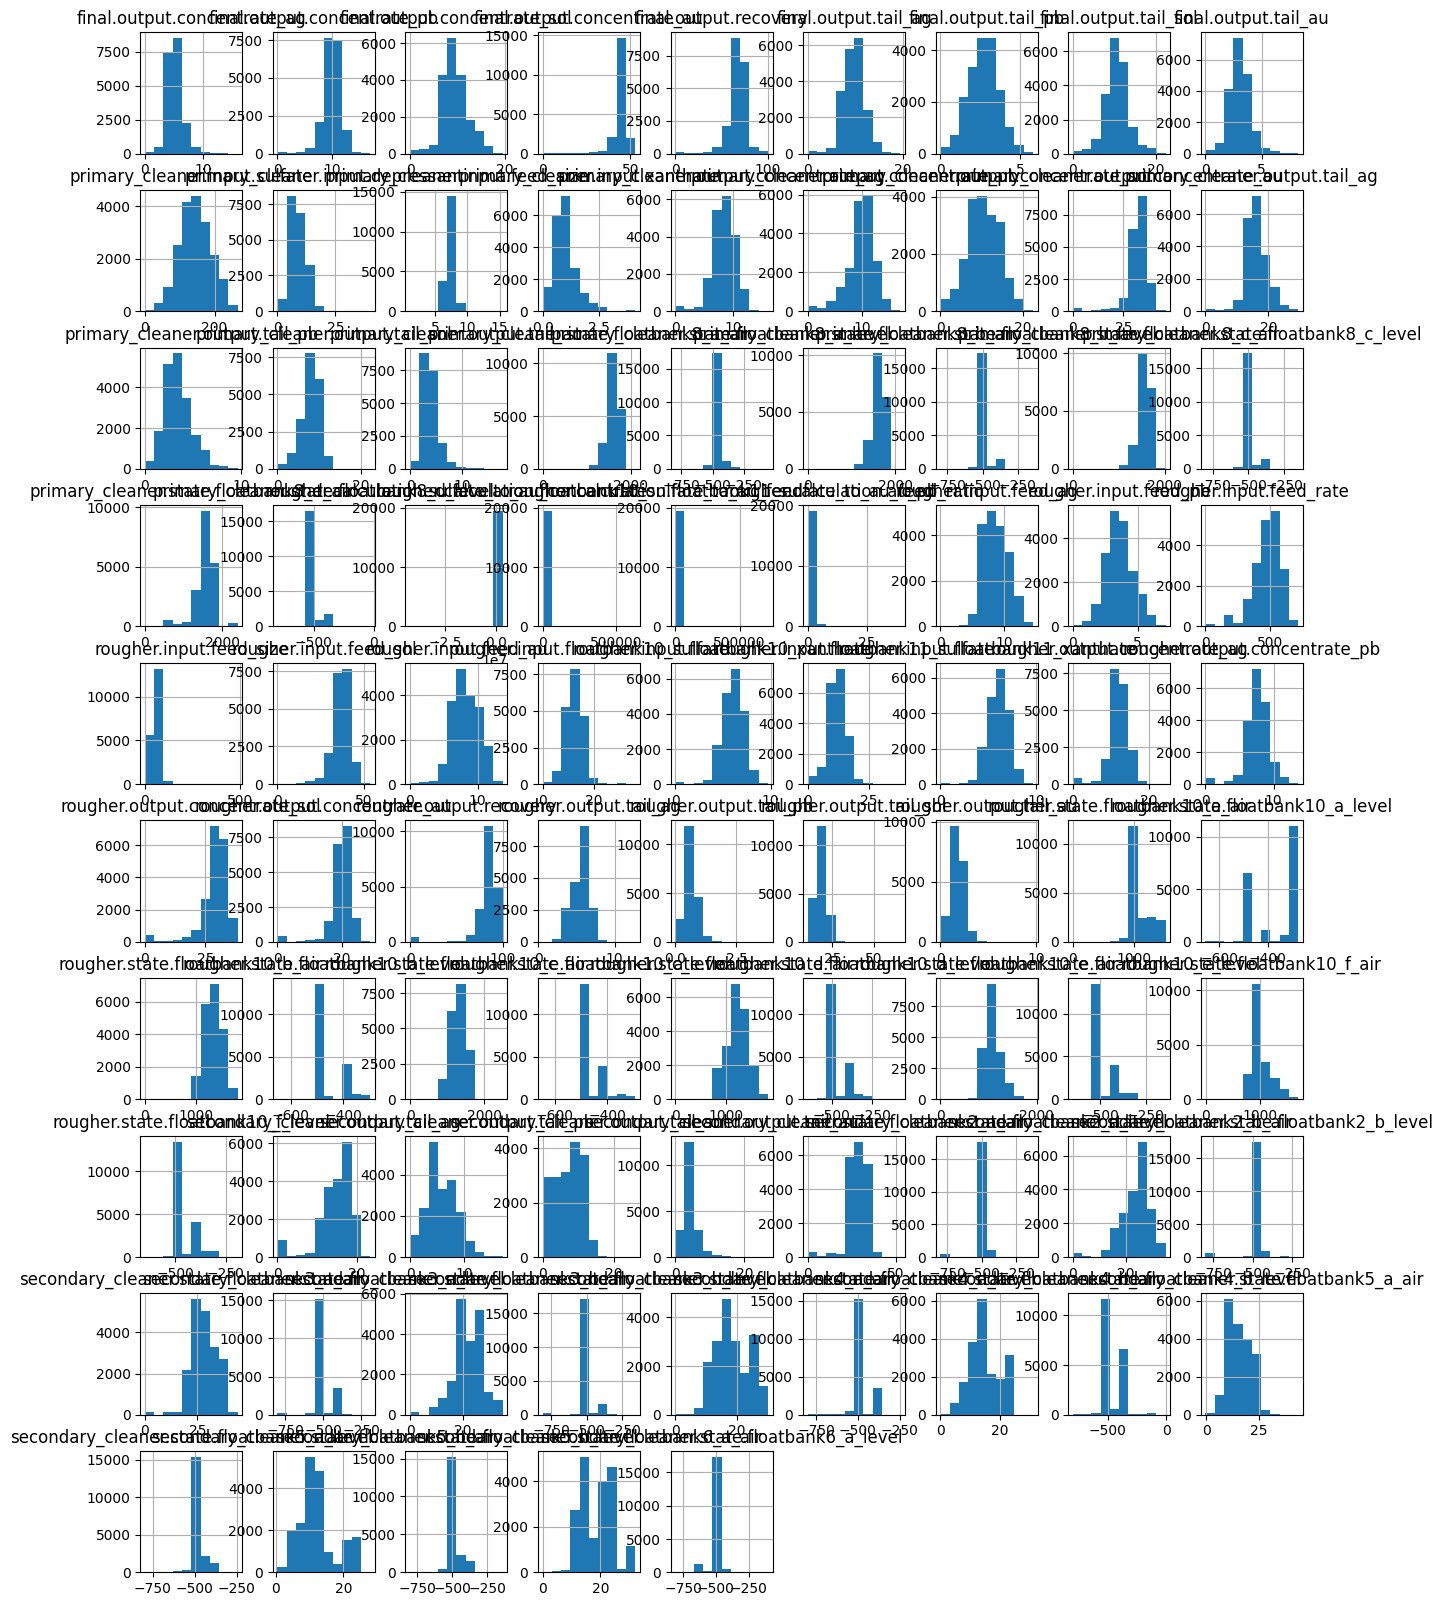

In [8]:
# Свод гистограмм для всех числовых столбцов датафрейма df_full
df_full.hist(figsize=(15, 20));

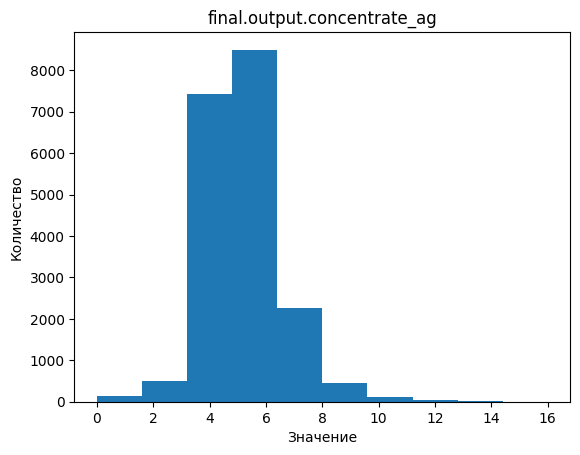

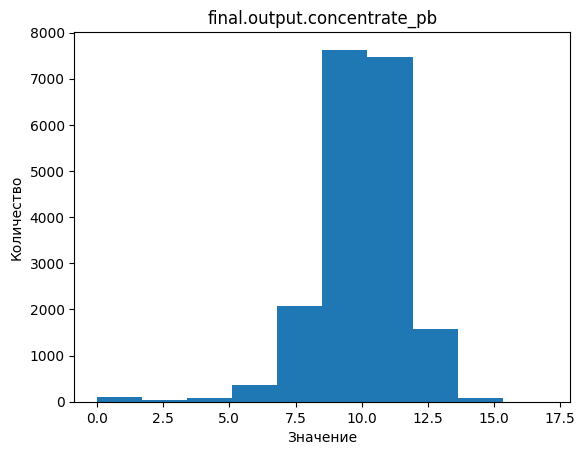

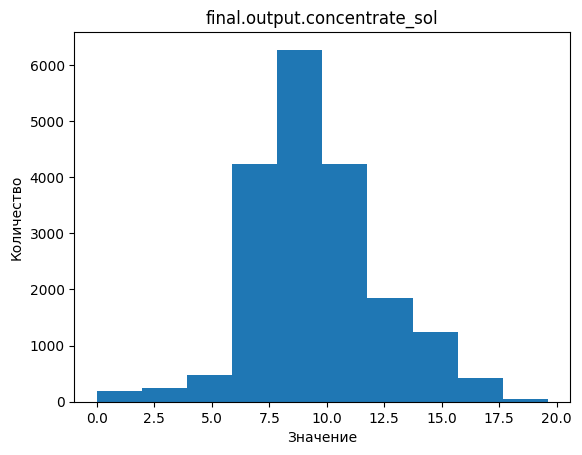

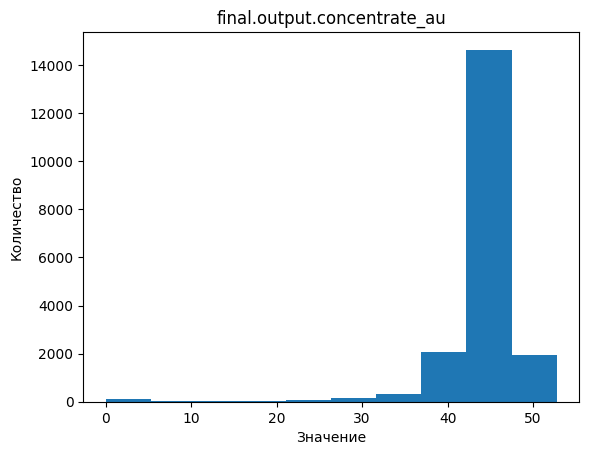

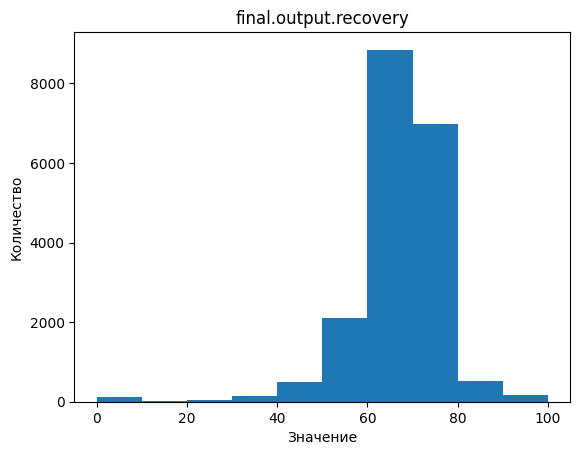

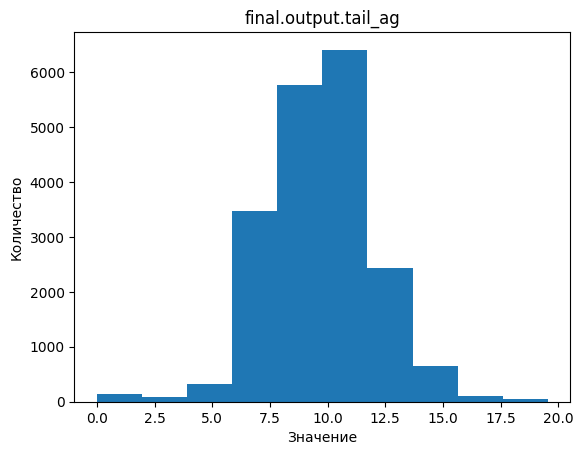

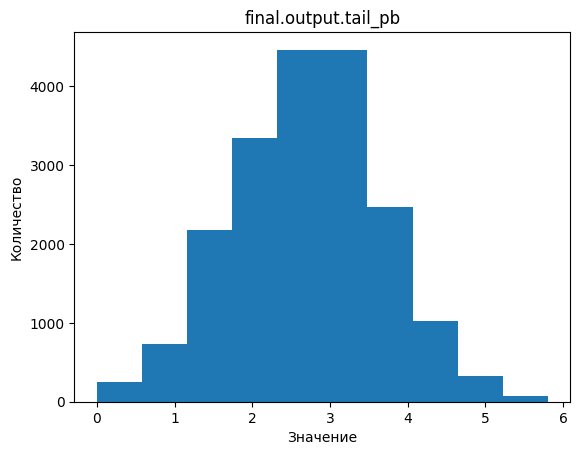

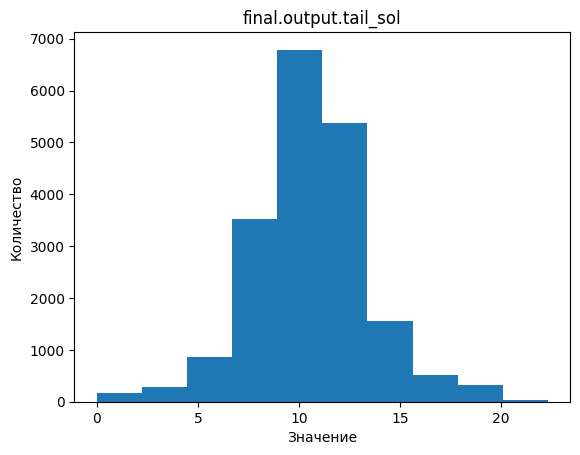

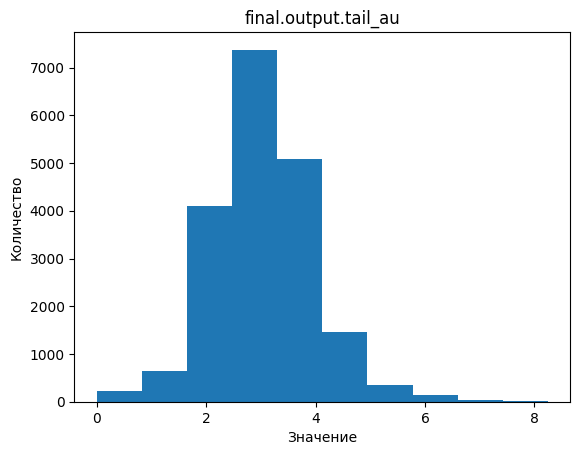

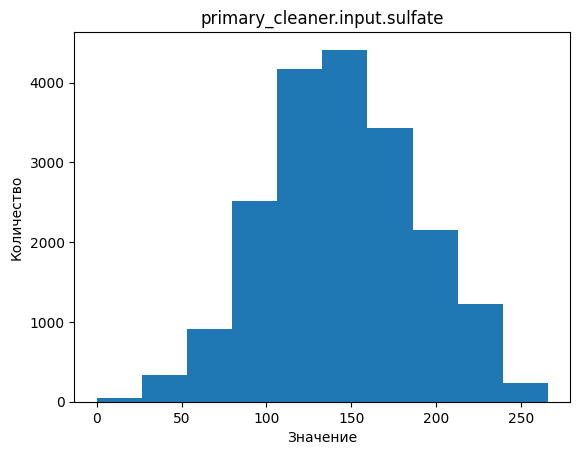

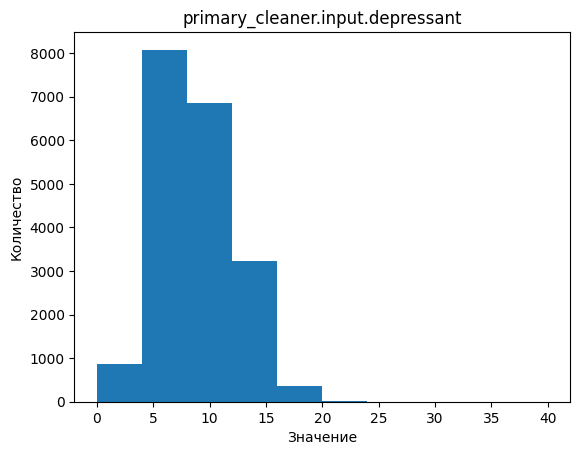

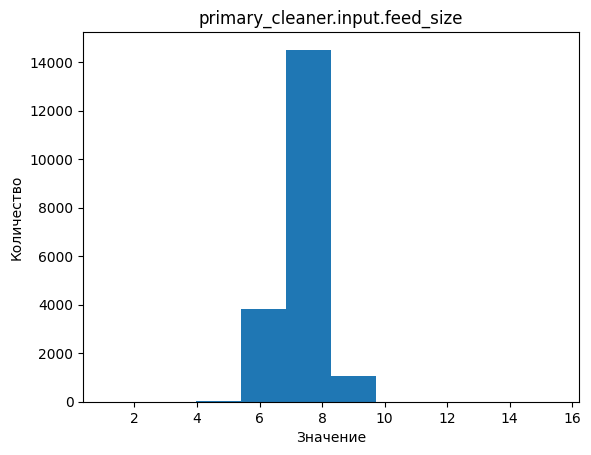

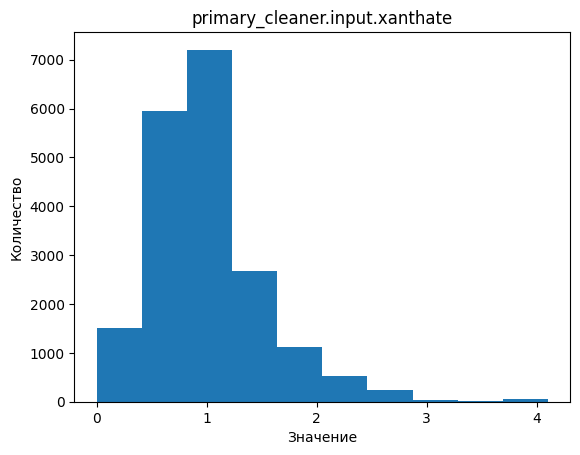

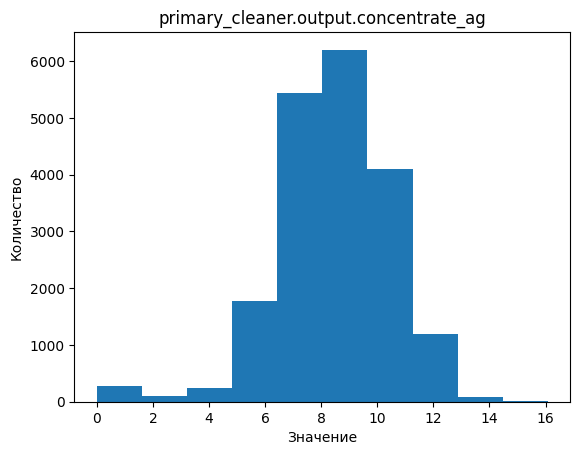

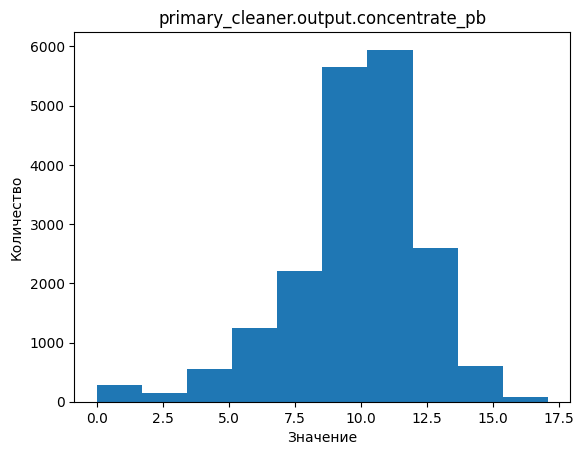

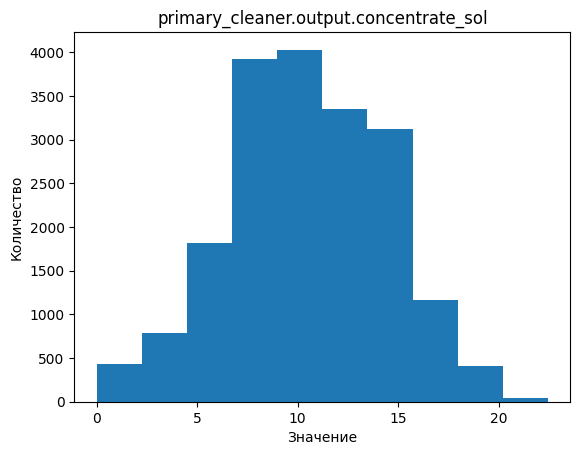

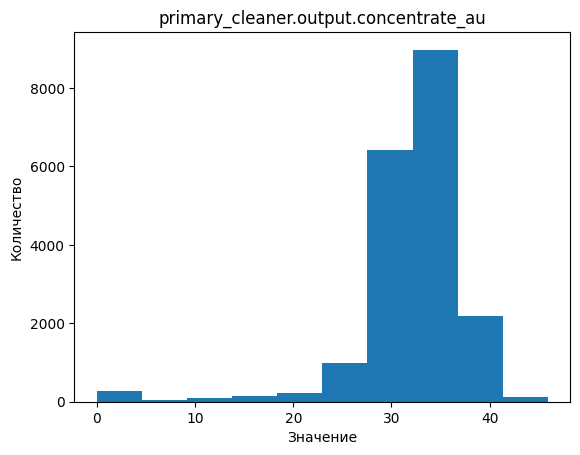

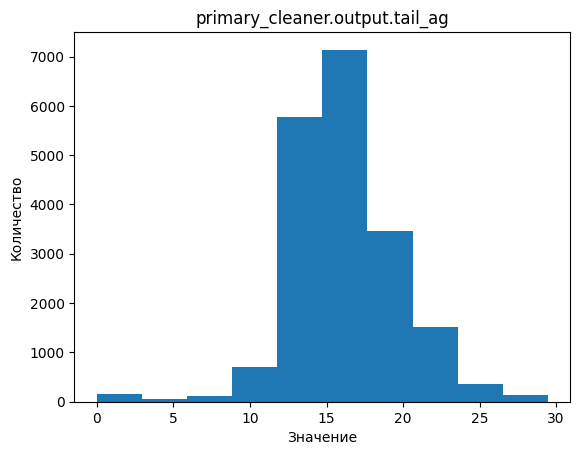

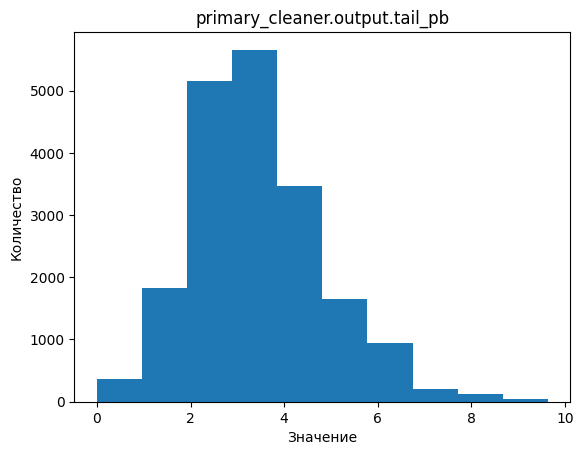

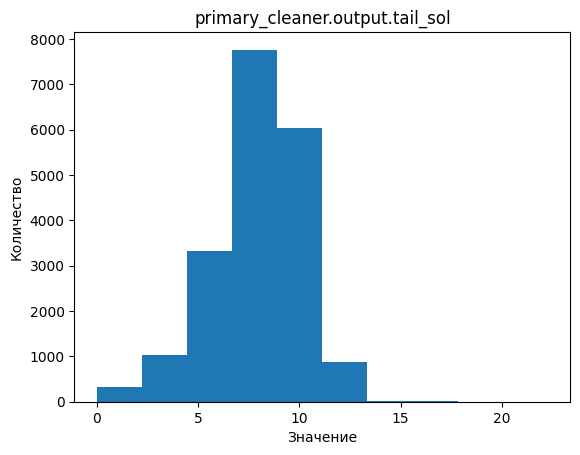

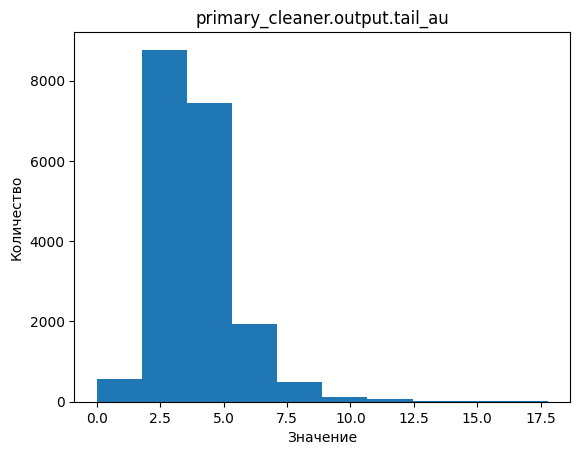

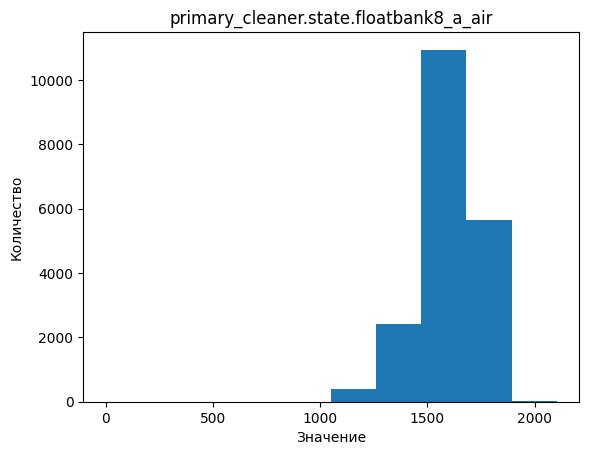

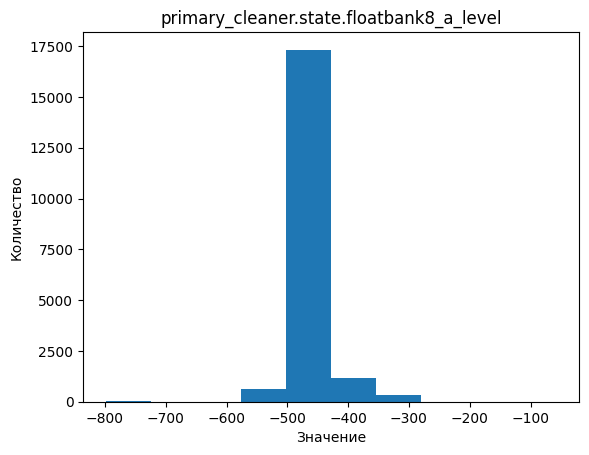

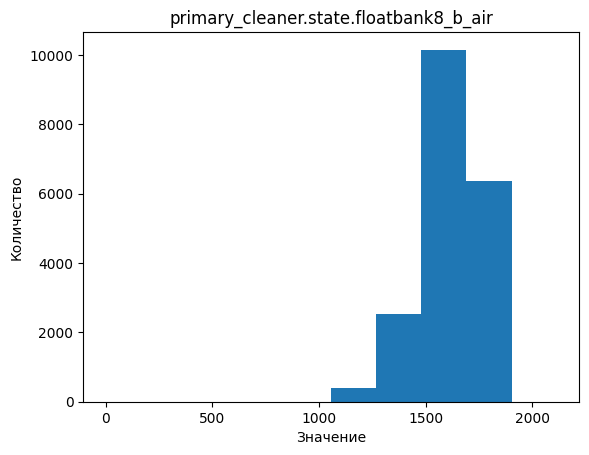

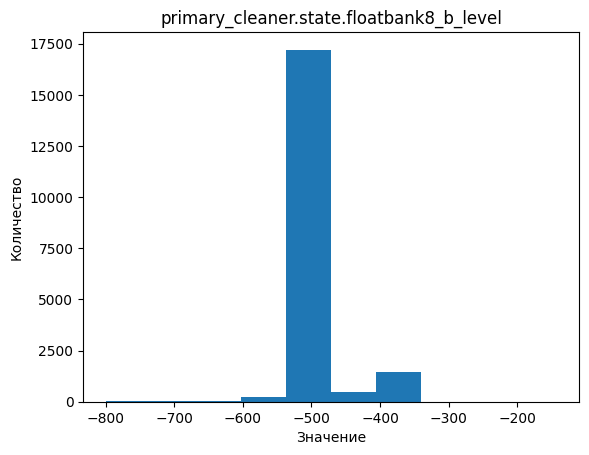

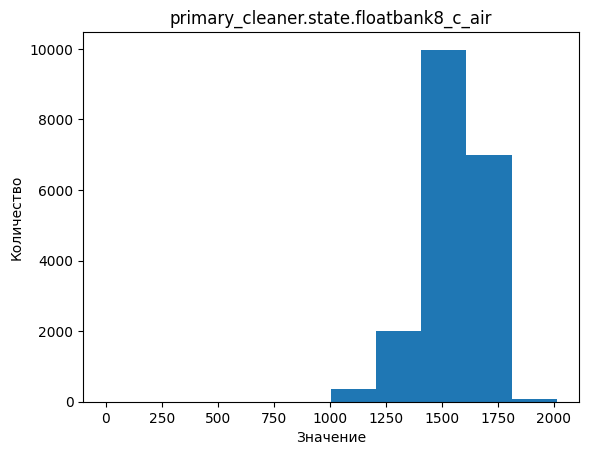

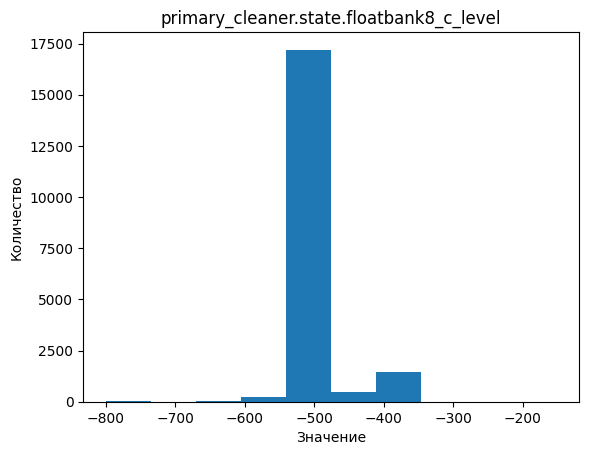

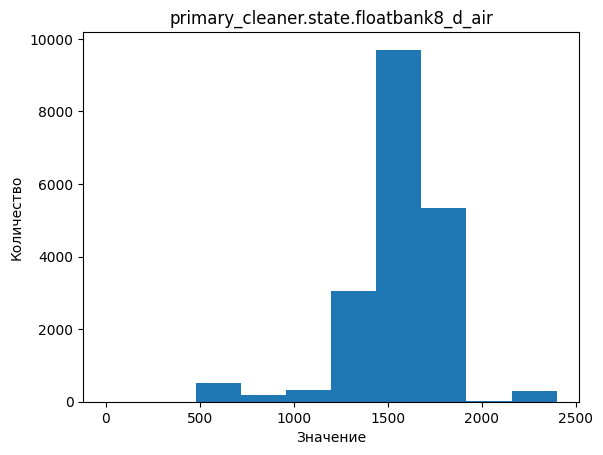

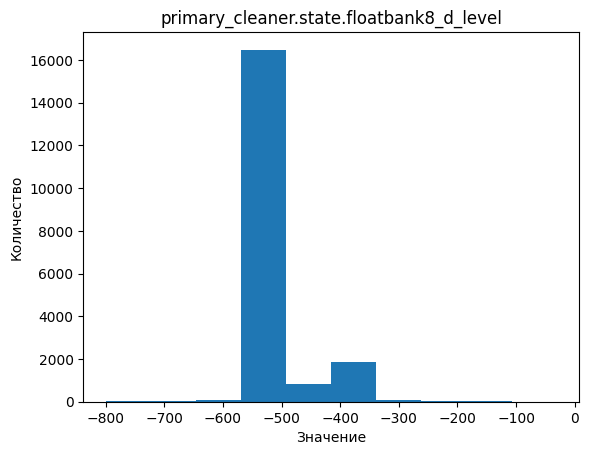

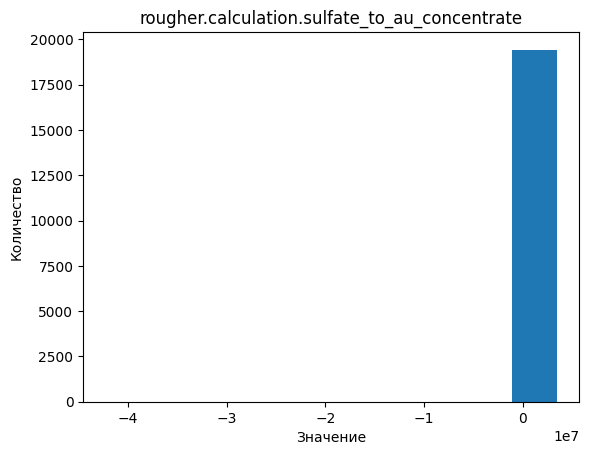

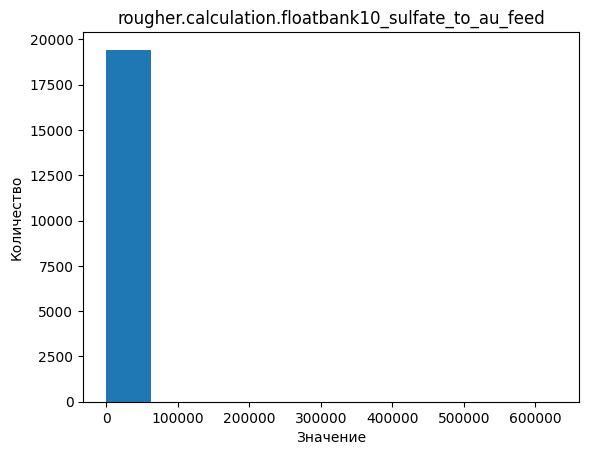

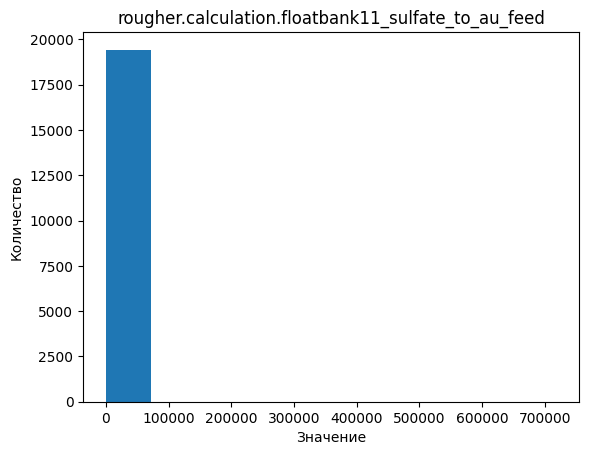

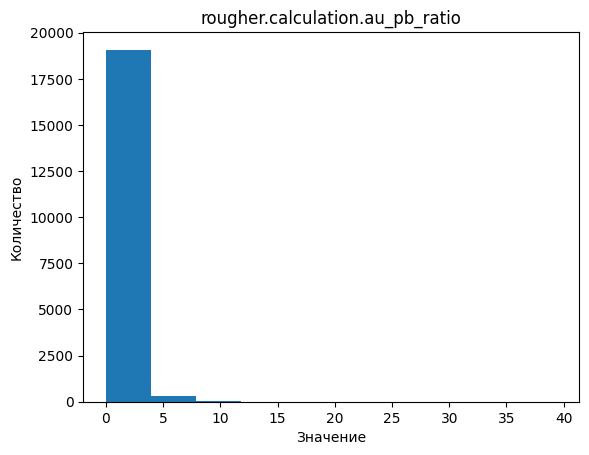

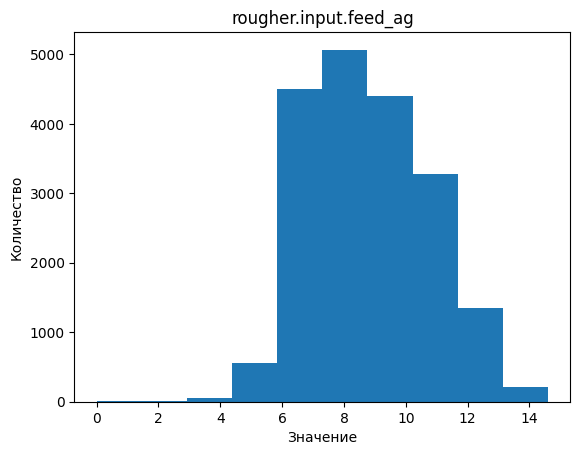

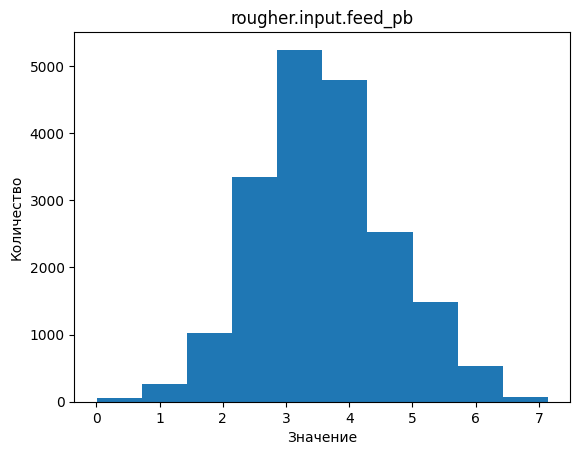

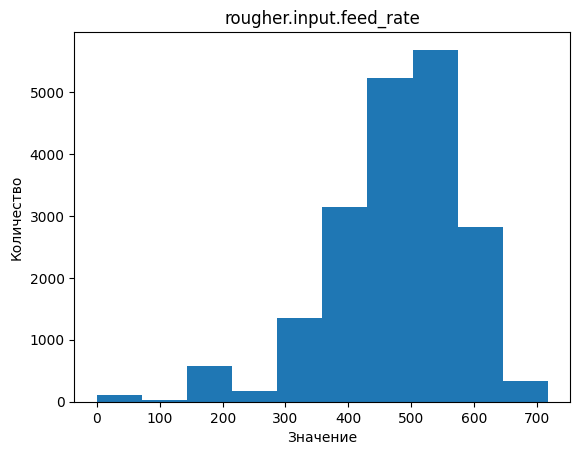

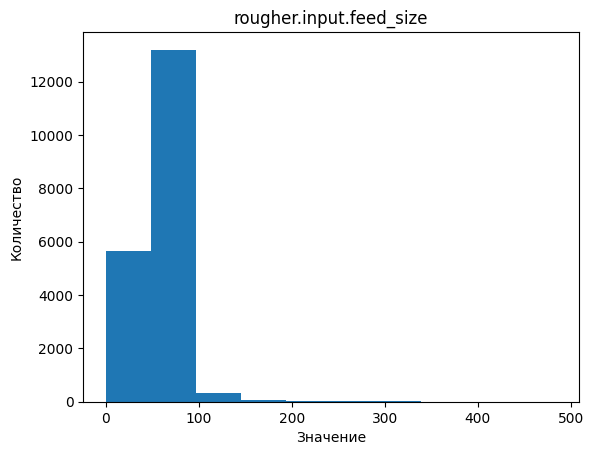

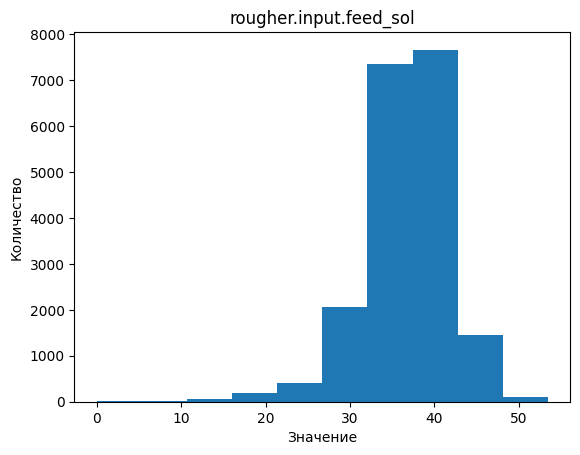

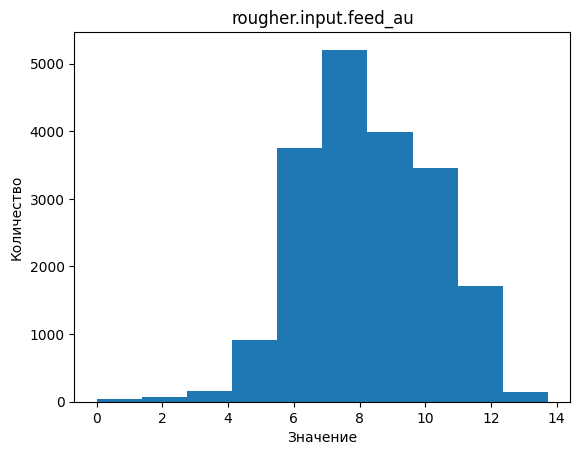

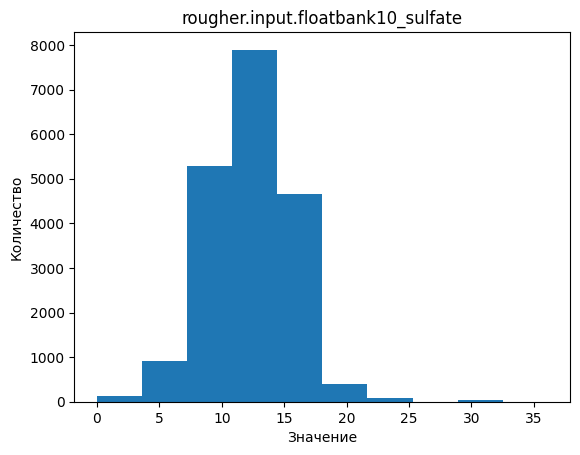

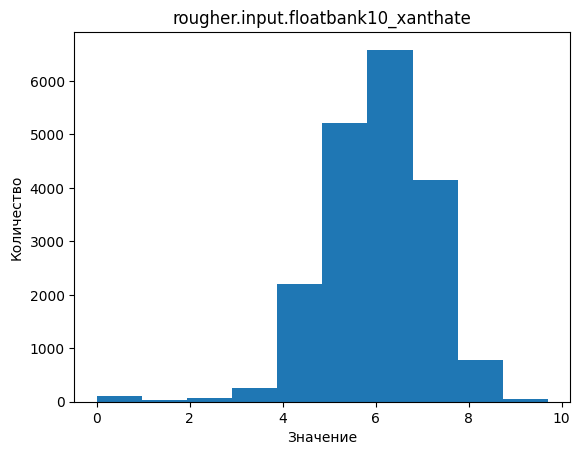

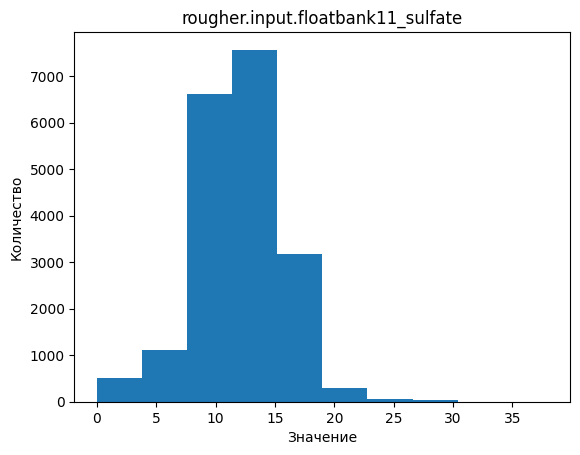

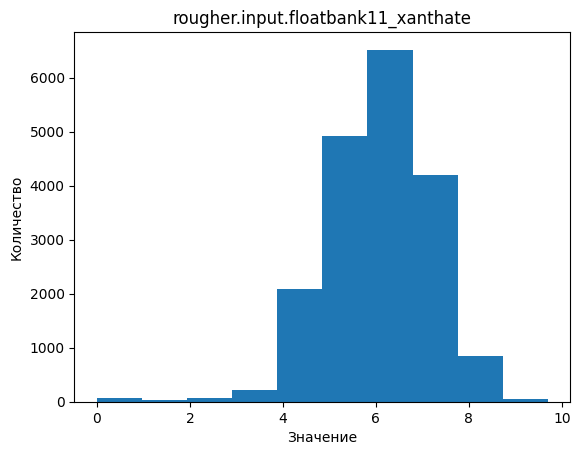

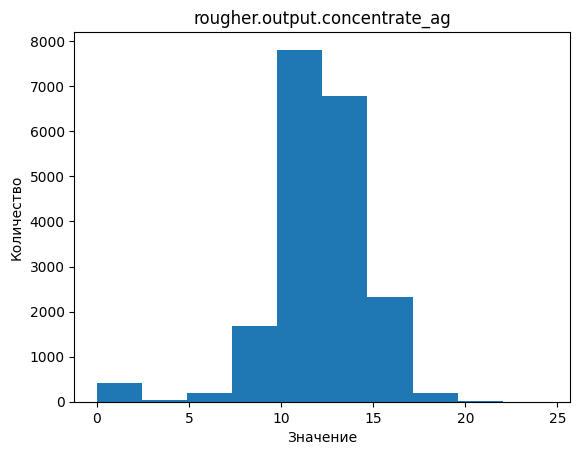

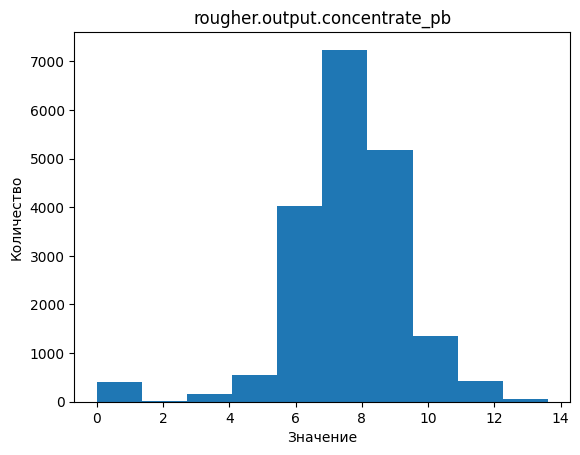

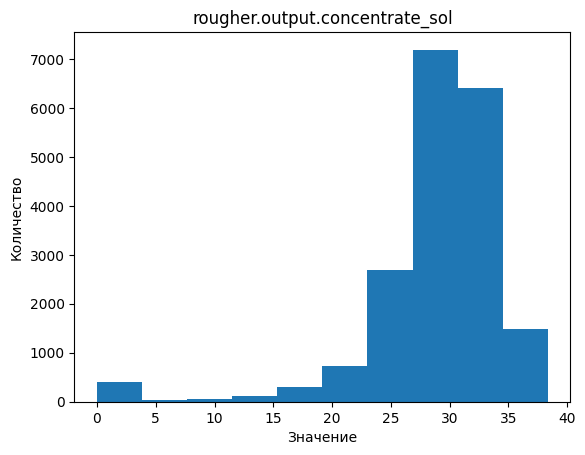

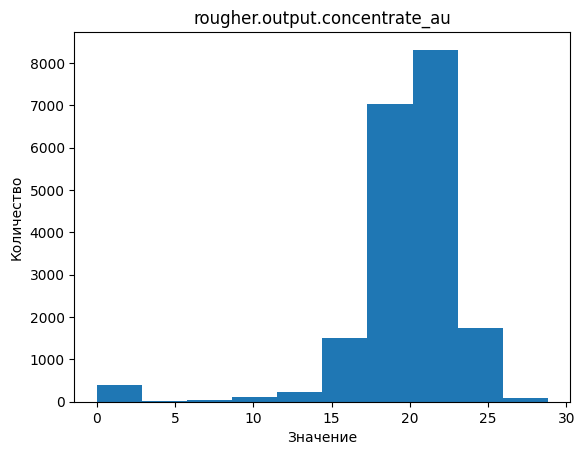

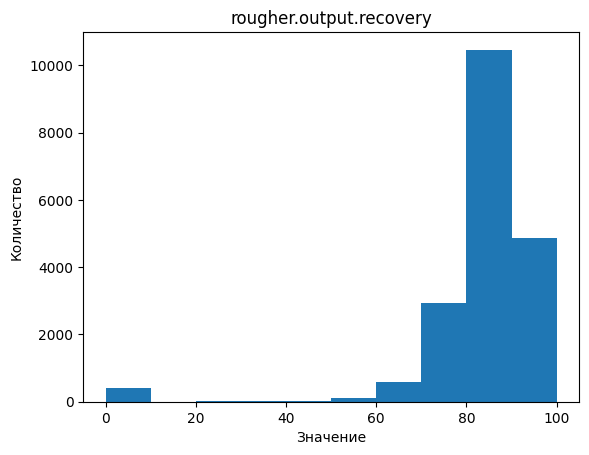

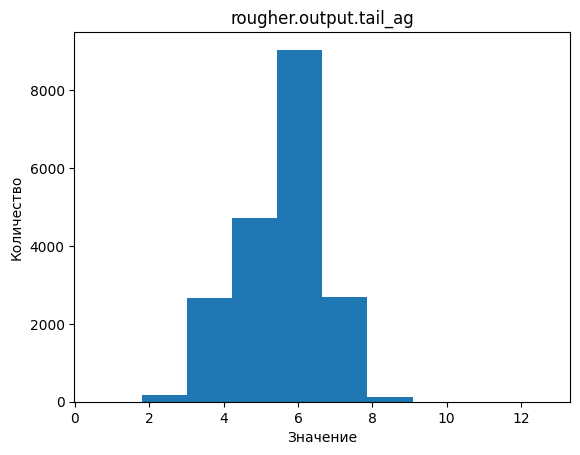

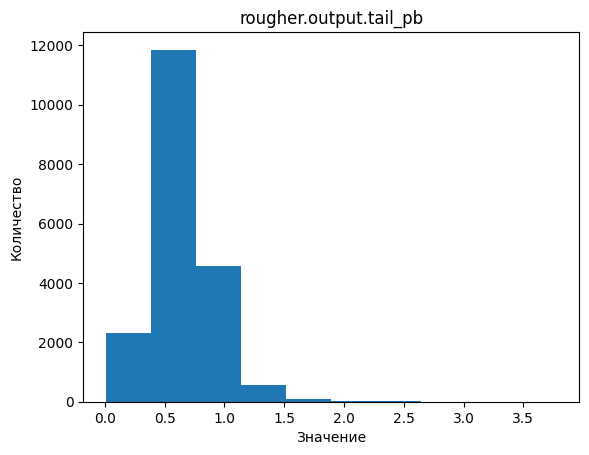

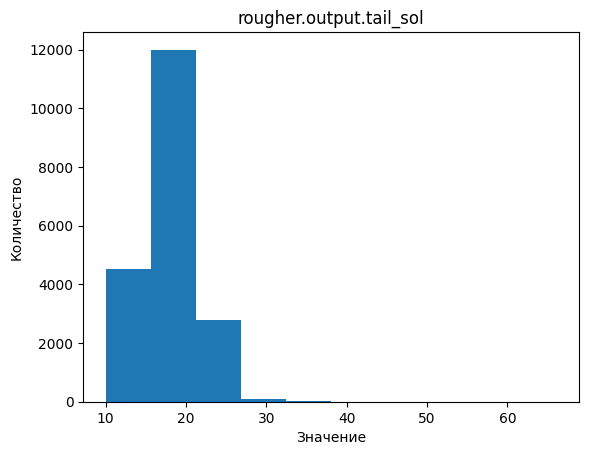

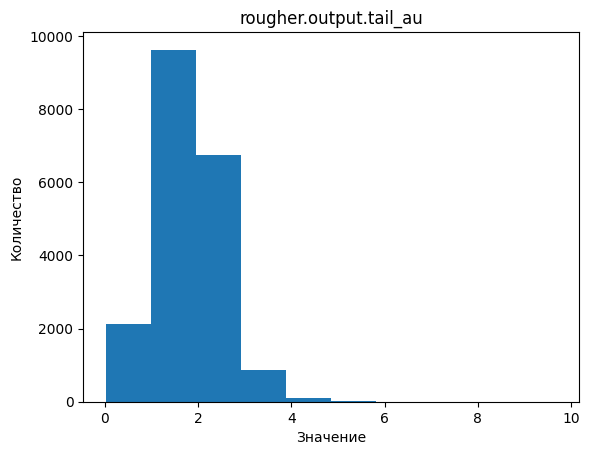

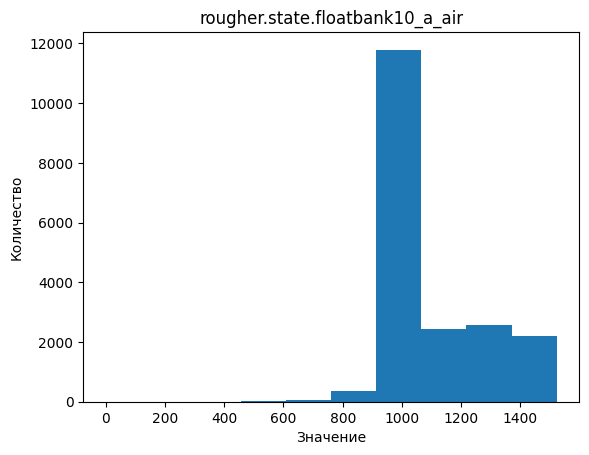

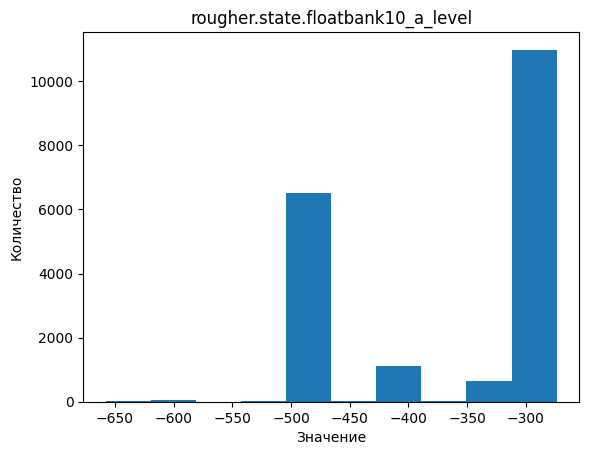

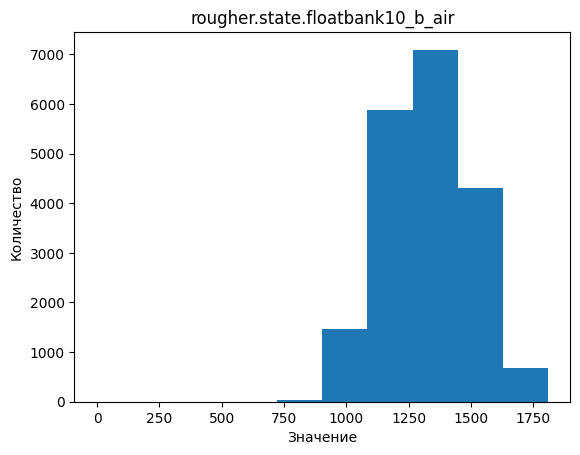

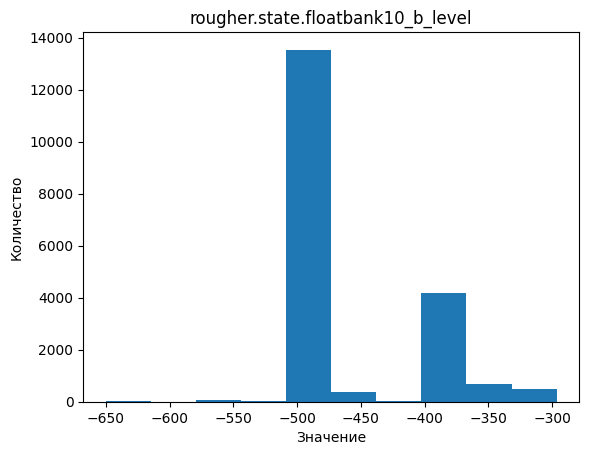

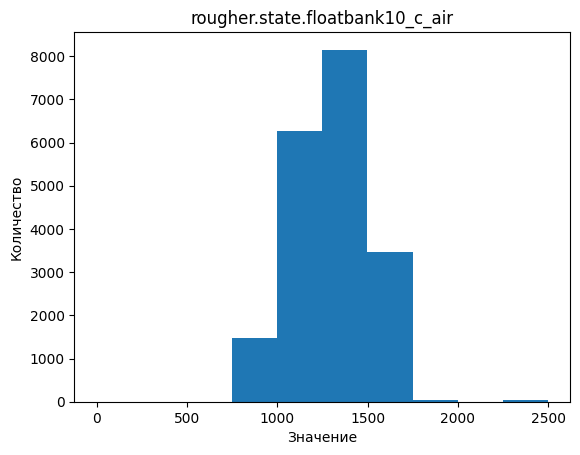

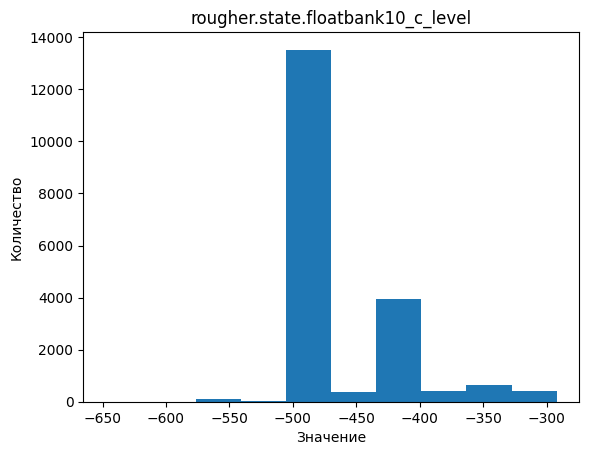

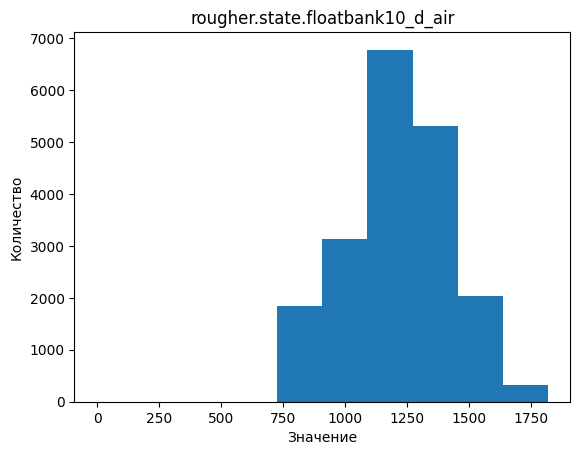

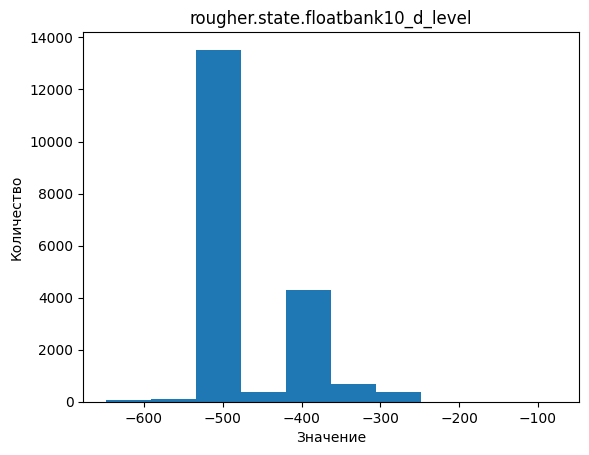

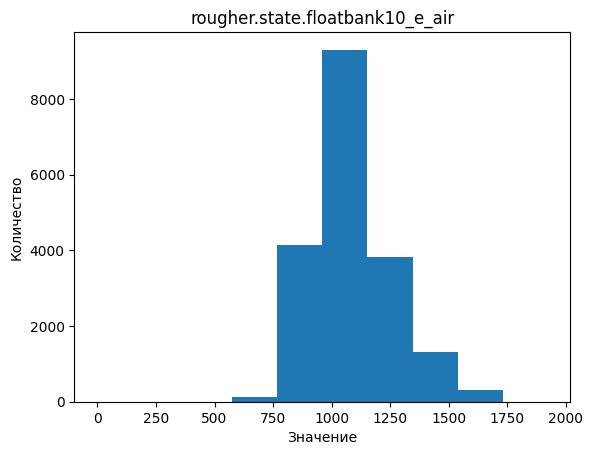

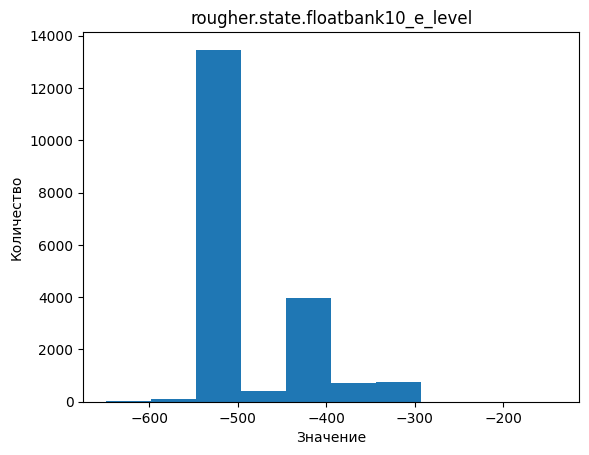

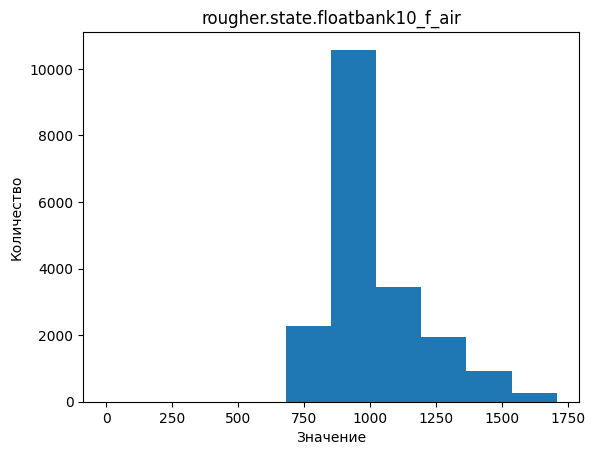

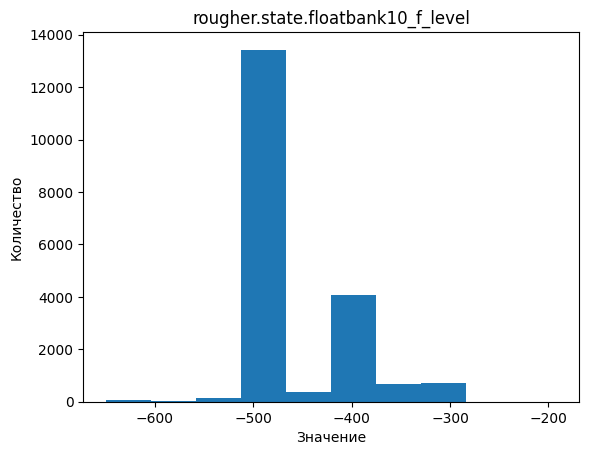

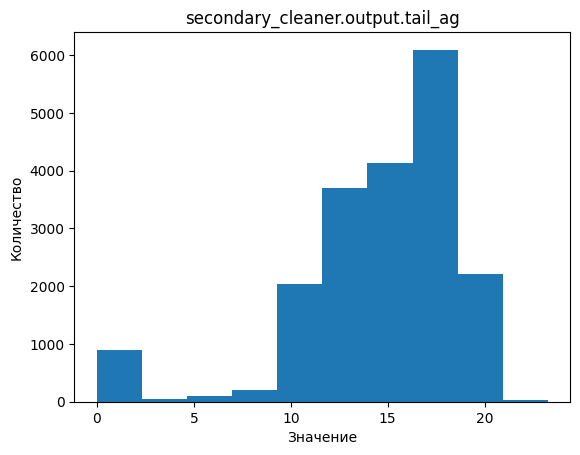

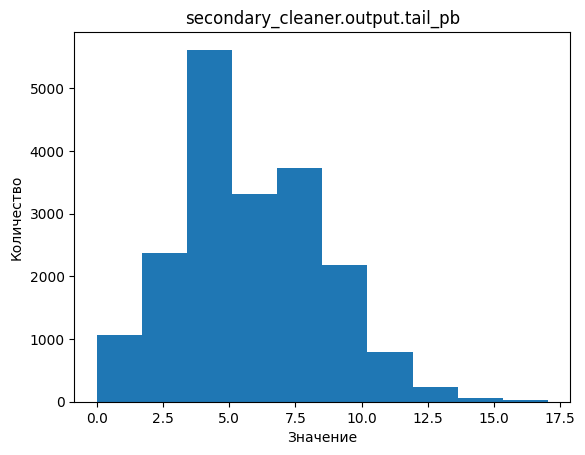

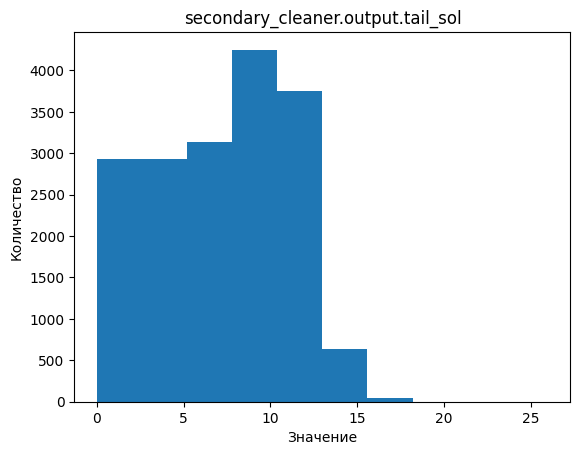

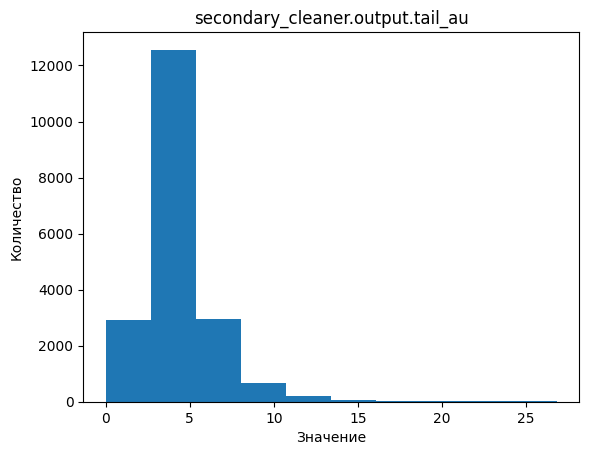

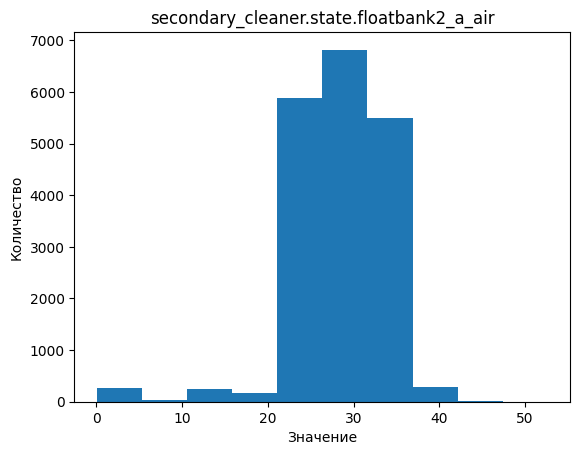

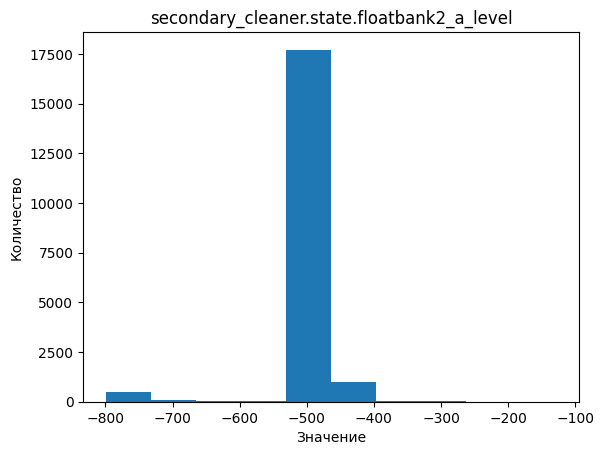

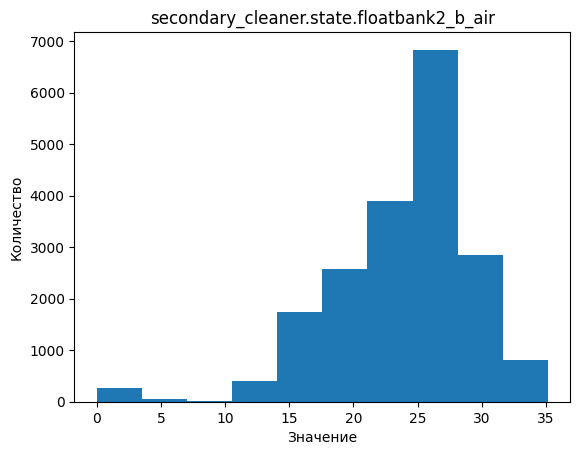

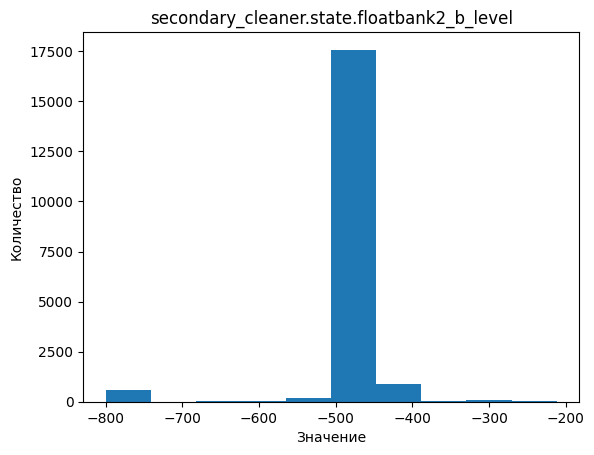

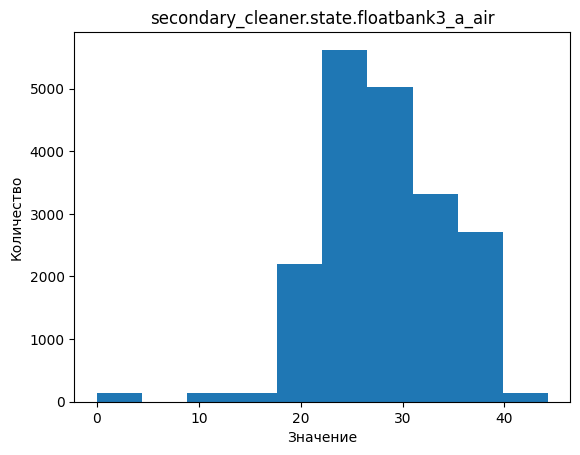

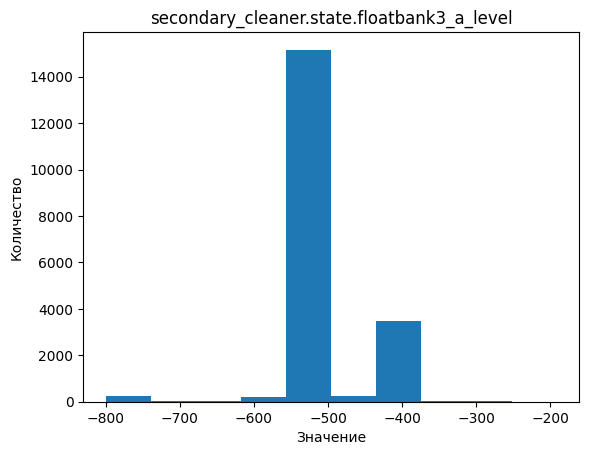

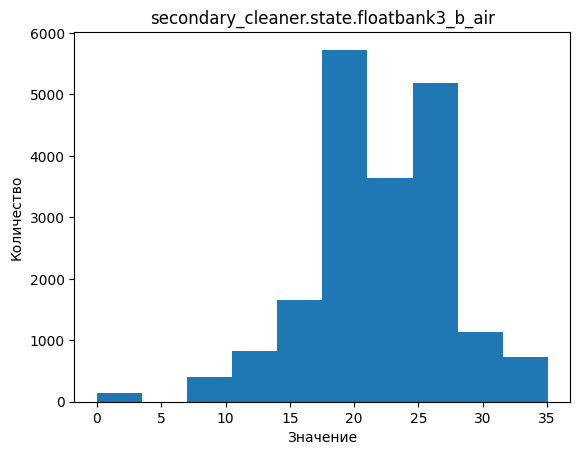

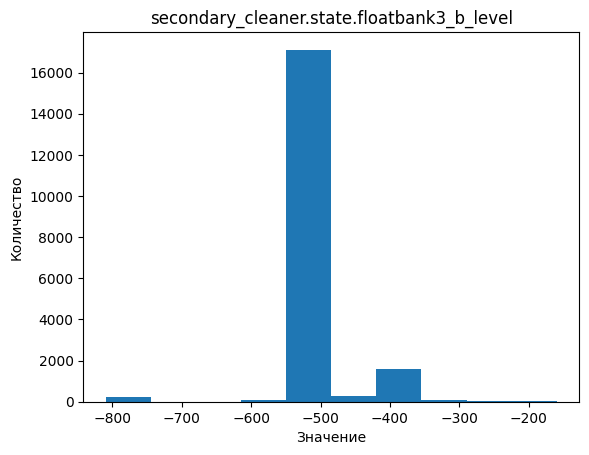

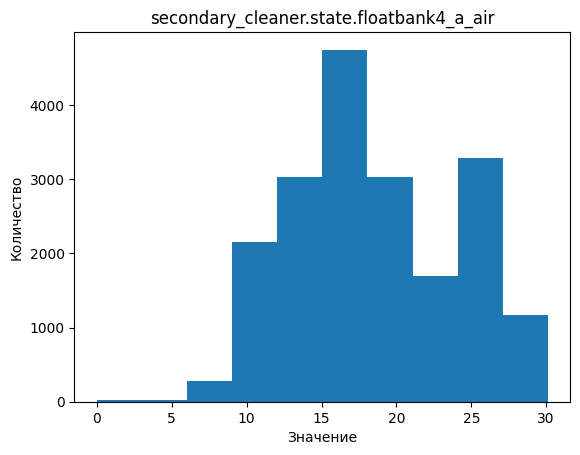

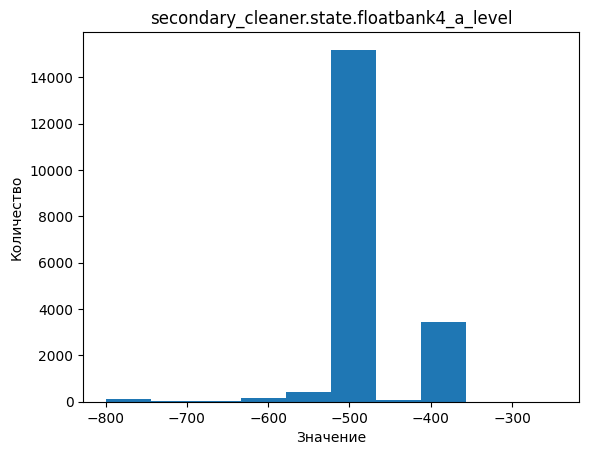

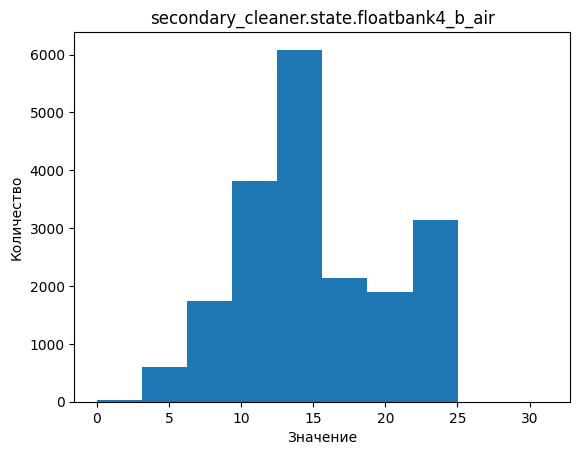

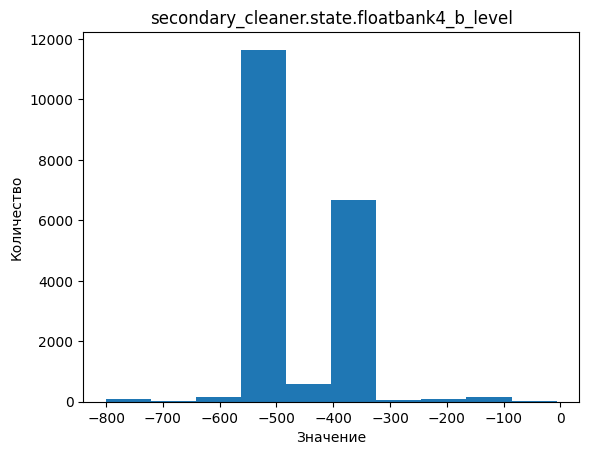

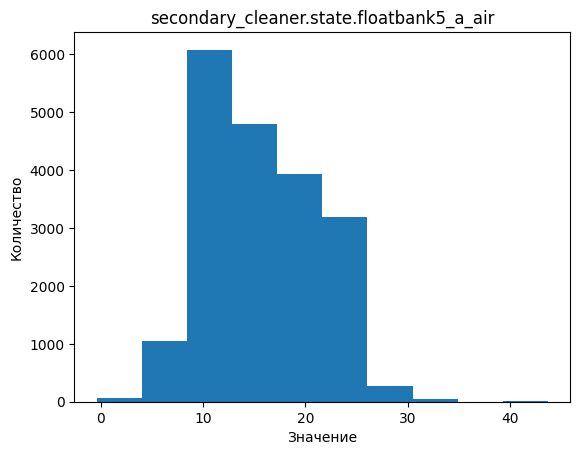

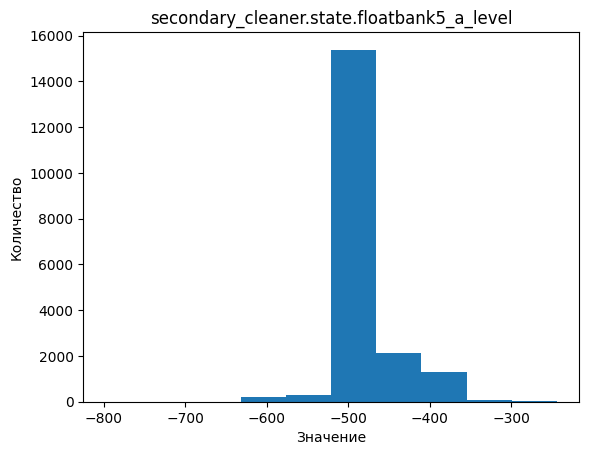

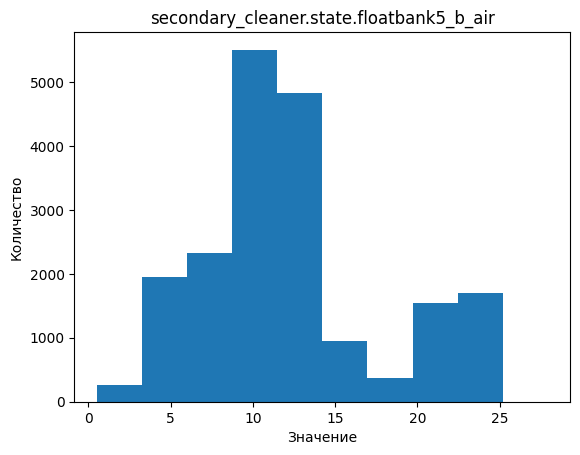

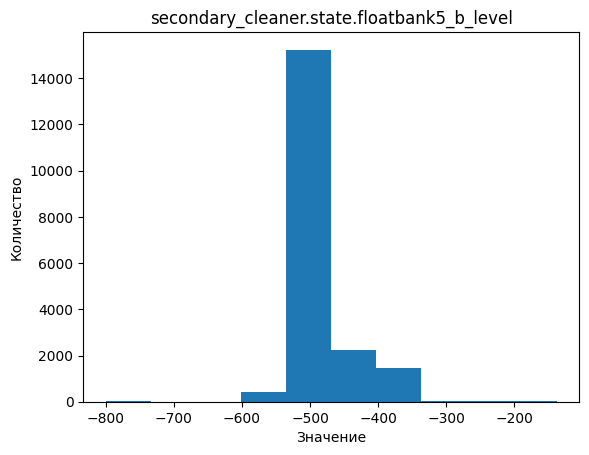

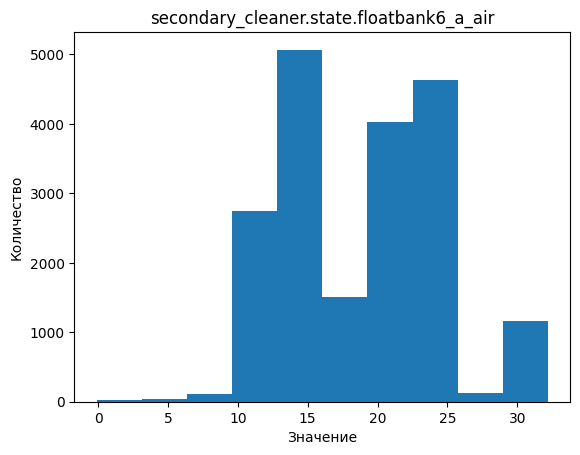

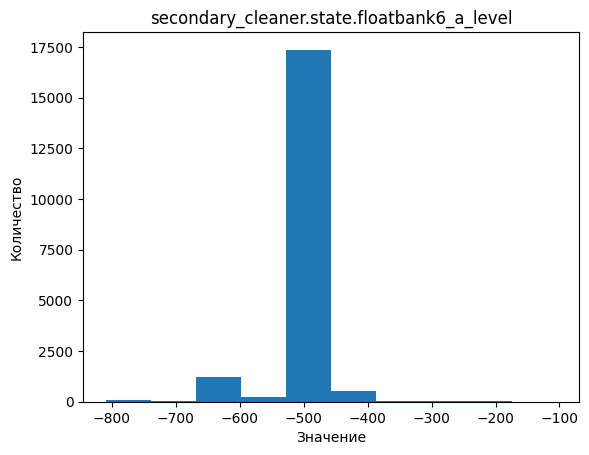

In [9]:
# Распределение данных по столбцам
for column in numeric_cols:
    data = df_full[[column]]
    plt.hist(data)
    plt.title(column)
    plt.xlabel('Значение')
    plt.ylabel('Количество')
    plt.show()

#### Выводы
- Все названия столбцов в нижнем регистре и не содержат спецсимволов, соответствует стилю snake_case.
- В данных имеются пропуски
- На графиках визуализированы распределения значений по всем числовым полям.
- Большинство признаков имеют нормальное распределение, но вместе с тем встречаются и скошенные распределения.
- У некоторых признаков видно значимое число значений в области нуля. Вероятно это выбросы, и в дальнейшем анализе нужно обратить на них внимание.

### Проверим, что эффективность обогащения рассчитана правильно.

Для этого рассчитаем recovery - коэффициент восстановления золота из золотосодержащей руды, на обучающем наборе данных df_train для целевого признака `rougher.output.recovery` на этапе флотации.
Проанализируем значение MAE - среднюю абсолютную процентную погрешность между прогнозом и имеющимися данными.

Эффективность обогащения рассчитывается по формуле:<br>

$Recovery= \frac {C \times (F - T)}{F \times (C - T)} \times 100\% $


In [10]:
def calculate_recovery(rougher_output, rougher_input, rougher_tail):
    recovery = (rougher_output * (rougher_input - rougher_tail)) /\
        (rougher_input * (rougher_output - rougher_tail)) * 100
    
    recovery[recovery < 0] = np.nan
    recovery[recovery > 100] = np.nan
    
    return recovery

In [11]:
# Посчитаем recovery на обучающей выборке
recovery = calculate_recovery(
    df_train['rougher.output.concentrate_au'], 
    df_train['rougher.input.feed_au'], 
    df_train['rougher.output.tail_au'],
)
print(recovery.describe())

count    14149.000000
mean        82.704502
std         14.479156
min         -0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
dtype: float64


In [12]:
# Вычислим MAE между нашими расчётами и значением признака rougher.output.recovery
df = pd.DataFrame({
    "rougher_output_recovery": df_train['rougher.output.recovery'],
    "recovery":  recovery}
    ).dropna()

mae_recovery = mean_absolute_error(df['rougher_output_recovery'], df['recovery'])
print('MAE =', mae_recovery)
del df

MAE = 9.73512347450521e-15


#### Выводы
MAE - средний модуль разности, и показывает как сильно предсказания в среднем отличаются от истинных значений. Полученное значение мало, а значит расчеты верны.

### Проанализируем признаки, недоступные в тестовой выборке.

Посмотрим, какие признаки есть в обучающей выборке. но нет в тестовой

In [13]:
def fields_diff(first_df, second_df):
    '''
    Возвращает те столбцы, которые есть в одном датасете, но нет в другом
    '''
    return set(first_df.columns.to_list()) - set(second_df.columns.to_list())

In [14]:
# Признаки, которые присутствуют в обучающем фрейме данных, но отсутствуют в тестовом фрейме данных
missing_test_fields = fields_diff(df_train, df_test)
print(df_train[list(missing_test_fields)].dtypes)


final.output.concentrate_pb                           float64
final.output.recovery                                 float64
rougher.output.tail_pb                                float64
primary_cleaner.output.tail_au                        float64
rougher.calculation.floatbank10_sulfate_to_au_feed    float64
rougher.output.tail_ag                                float64
rougher.output.concentrate_sol                        float64
primary_cleaner.output.tail_pb                        float64
primary_cleaner.output.concentrate_sol                float64
final.output.tail_au                                  float64
secondary_cleaner.output.tail_au                      float64
rougher.calculation.floatbank11_sulfate_to_au_feed    float64
secondary_cleaner.output.tail_pb                      float64
final.output.tail_pb                                  float64
final.output.concentrate_ag                           float64
primary_cleaner.output.concentrate_au                 float64
primary_

#### Выводы:
- Все признаки имеют тип float
- Признаки output - целевые признаки и поэтому отсутствуют в тестовой выборке
- В тестовой выборке в том числе отсутствуют целевые признаки `rougher.output.recovery` и `final.output.recovery`, которые будут нужны для расчета метрики качества.
- Признаки rougher.calculation - это расчетные характеристики и отсутвуют они скорее всего из-за того, что они расчитываются после завершения процесса.

### Предобработка данных

Оценим сколько процентов данных в датасете пропущено.

In [15]:
def print_na_percent(df):
    '''
    Сколько процентов данных в датасете пропущено
    '''
    print_df(df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100)

In [16]:
print_na_percent(df_train)

secondary_cleaner.output.tail_sol                     11.343558
rougher.state.floatbank10_e_air                        3.081490
rougher.input.floatbank11_xanthate                     3.024949
primary_cleaner.output.concentrate_sol                 2.021344
secondary_cleaner.state.floatbank2_a_air               1.533677
final.output.concentrate_sol                           1.491271
rougher.input.feed_size                                1.017740
rougher.input.feed_pb                                  0.706764
final.output.tail_pb                                   0.706764
primary_cleaner.input.xanthate                         0.706764
primary_cleaner.output.concentrate_pb                  0.607817
rougher.input.feed_sol                                 0.551276
primary_cleaner.output.tail_sol                        0.325111
rougher.input.floatbank11_sulfate                      0.254435
primary_cleaner.input.depressant                       0.226164
rougher.input.floatbank10_sulfate       

In [17]:
print_na_percent(df_test)

rougher.input.floatbank11_xanthate            0.472590
rougher.input.feed_sol                        0.396975
secondary_cleaner.state.floatbank3_a_air      0.170132
rougher.input.floatbank11_sulfate             0.151229
primary_cleaner.input.depressant              0.094518
rougher.input.floatbank10_sulfate             0.094518
primary_cleaner.input.sulfate                 0.075614
primary_cleaner.input.xanthate                0.075614
rougher.input.feed_rate                       0.056711
secondary_cleaner.state.floatbank2_a_air      0.056711
secondary_cleaner.state.floatbank2_b_air      0.037807
rougher.input.feed_size                       0.018904
secondary_cleaner.state.floatbank3_b_level    0.000000
secondary_cleaner.state.floatbank3_b_air      0.000000
rougher.state.floatbank10_f_air               0.000000
rougher.state.floatbank10_f_level             0.000000
secondary_cleaner.state.floatbank6_a_air      0.000000
secondary_cleaner.state.floatbank5_b_level    0.000000
secondary_

### Добавим недостающие целевые признаки в тестовую выборку
Данные полей `rougher.output.recovery`, `final.output.recovery` заполняются по факту реальных измерений. Добавим эти поля в тестовую выборку, и заполним значениями, используя метод merge (в качестве индексов используем колонку date, так как данные индексируются датой и временем получения информации).

In [18]:
print(df_test.shape)
df_test = df_test.merge(df_full[TARGETS].loc[df_test.index], on='date', how='left')
print(df_test.shape)

(5290, 52)
(5290, 54)


Строки с пропусками в целевых показателях нужно удалить в обучающей и тестовой выборках.

In [19]:
df_train = df_train.dropna(subset=TARGETS)
df_test = df_test.dropna(subset=TARGETS)

#### Избавимся от пропусков.

По условию задачи, известно, что данные индексируются датой и временем получения информации (date).

Соседние по времени параметры часто похожи. Воспользуемся этим условием.

С помощью функции ffill заполним отсутствующие значения в тренировочной и тестовой выборках. Функция заполняет пропуски предпоследним значением признака (значения даты расположены по возрастанию).

In [20]:
df_train = df_train.fillna(method='ffill')
df_test = df_test.fillna(method='ffill')
print('В df_train есть пропуски: ', df_train.isnull().values.any())
print('В df_test есть пропуски: ', df_test.isnull().values.any())

В df_train есть пропуски:  False
В df_test есть пропуски:  False


#### Проверка на дубликаты

In [21]:
# Посмотрим на количество явных дубликатов в датафреймах
cnt = 0
for df in [df_train, df_test, df_full]:
    cnt += 1
    print(f'Количество явных дубликатов в {cnt}-ом датасете - ', df.duplicated().sum())

Количество явных дубликатов в 1-ом датасете -  0
Количество явных дубликатов в 2-ом датасете -  0
Количество явных дубликатов в 3-ом датасете -  0


## Выводы по подготовке данных
- Проверена правильность расчета эффективности обогащения. МАЕ равно предельно малому значению (отличие предсказаний от истинных значений).
- В тестовую выборку были добавлены целевые признаки (`rougher.output.recovery`, `final.output.recovery`), которые будут необходимы в дальнейшем для рассчета итоговой метрики качества.
- Именование колонок соответствует стандарту `snake_case`.
- Типы данных соответствуют содержимому.
- Пропуски в наборах данных (тренировочная выборки и тестовая) были заполнены значениями предшествующими по времени (так как в условии задачи сказано, что: "Соседние по времени параметры часто похожи").
- Дубликаты отсутствуют.

## Исследовательский анализ данных

### Концентрация металлов (Au, Ag, Pb) на различных этапах очистки
Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

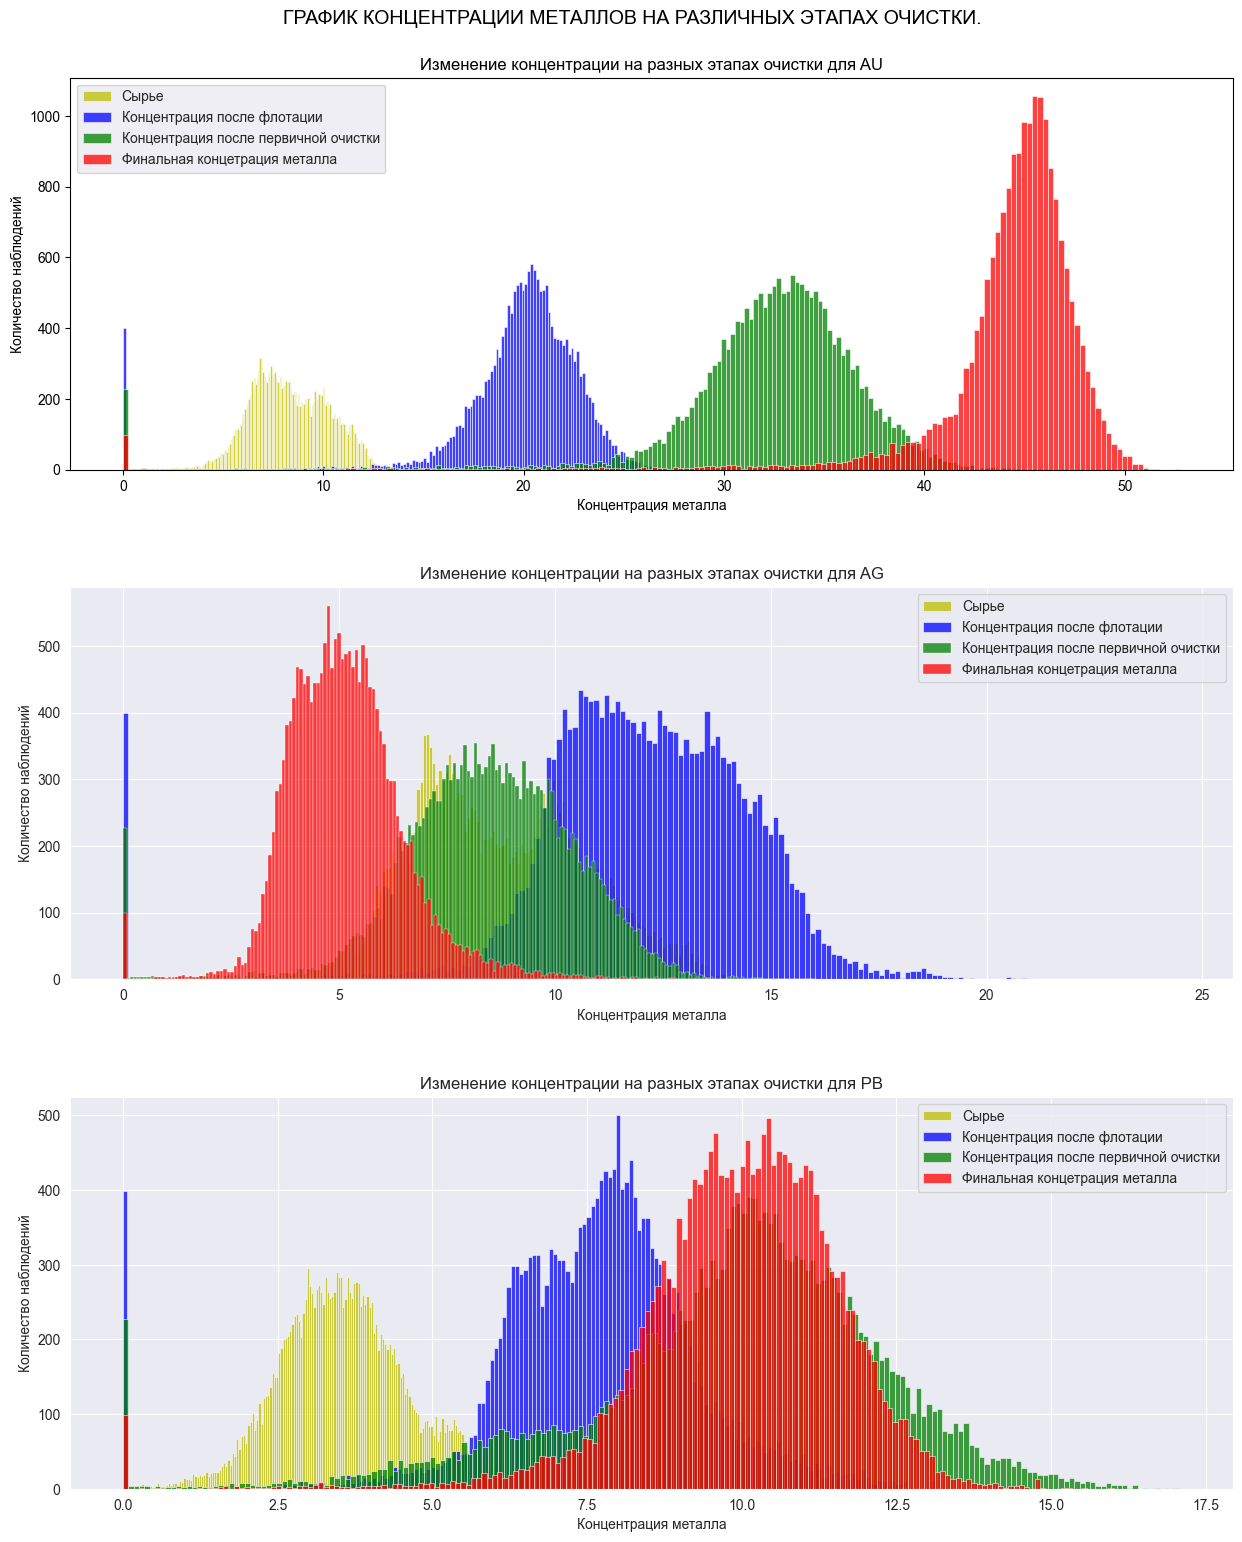

In [22]:
position = 0
plt.figure(figsize=[15, 17])
plt.subplots_adjust(top=0.94, wspace=0.2, hspace=0.3)
plt.suptitle('ГРАФИК КОНЦЕНТРАЦИИ МЕТАЛЛОВ НА РАЗЛИЧНЫХ ЭТАПАХ ОЧИСТКИ.', fontsize=14)

for metal in METALS:
    position += 1
    plt.subplot(3, 1, position)
    plt.title('Изменение концентрации на разных этапах очистки для {}'.format(metal.upper()), fontsize=12)
    sns.set_style('darkgrid')
    sns.histplot(df_full[f'rougher.input.feed_{metal}'], bins=200, color='y', label='Сырье', kde=False)
    sns.histplot(df_full[f'rougher.output.concentrate_{metal}'], bins=200, color='b', label='Концентрация после флотации', kde=False)
    sns.histplot(df_full[f'primary_cleaner.output.concentrate_{metal}'], bins=200, color='g', label='Концентрация после первичной очистки', kde=False)
    sns.histplot(df_full[f'final.output.concentrate_{metal}'], bins=200, color='r', label='Финальная концетрация металла',kde=False)
    plt.xlabel('Концентрация металла')
    plt.ylabel('Количество наблюдений')
    plt.legend()
    
plt.show()

Поместим средние значения концентрации на каждом из этапов очистки в таблицу и отобразим ее значения в виде графика.

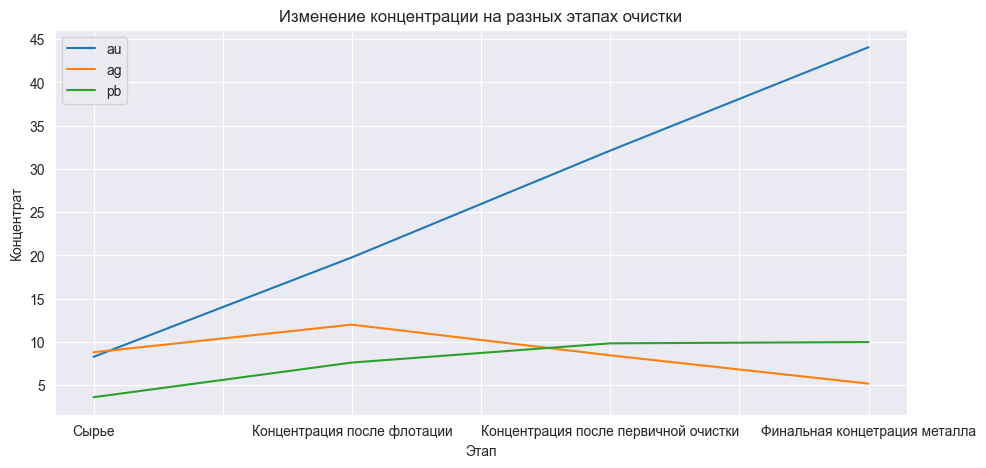

,Сырье,Концентрация после флотации,Концентрация после первичной очистки,Финальная концетрация металла
au,8.266097,19.772,32.1194,44.076513
ag,8.794927,11.994759,8.442408,5.16847
pb,3.598085,7.606272,9.82953,9.978895


In [23]:
k = CONCENTRATE_METRICS_DSC.keys()
v = CONCENTRATE_METRICS_DSC.values()
df_concentrate = pd.DataFrame(columns=v)
for metal in METALS:
    metal = metal.lower()
    for metric in k:
        df_concentrate.loc[metal, CONCENTRATE_METRICS_DSC[metric]] = df_full['{}_{}'.format(metric, metal)].mean()

for metal in METALS:
    df_concentrate.loc[metal].plot(
        title='Изменение концентрации на разных этапах очистки', 
        grid=True, 
        legend=True, 
        figsize=(11, 5)
    ).set(xlabel='Этап', ylabel = 'Концентрат')
plt.show()

display(df_concentrate)

#### Выводы:
- В данных для каждого металла присутствуют аномалии.
- Концентрация Au (золота) растет на протяжеии всех этапов и в конце становится в 5.3 раза больше, чем в начале
- Концентрация Ag (серебра) падает начиная с этапа флотации, в 1.6 раз
- Концентрация Pb (свинца) медленно растет на протяжении всех этапов очистки, в 2.8 раза

### Распределения размеров гранул сырья
Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

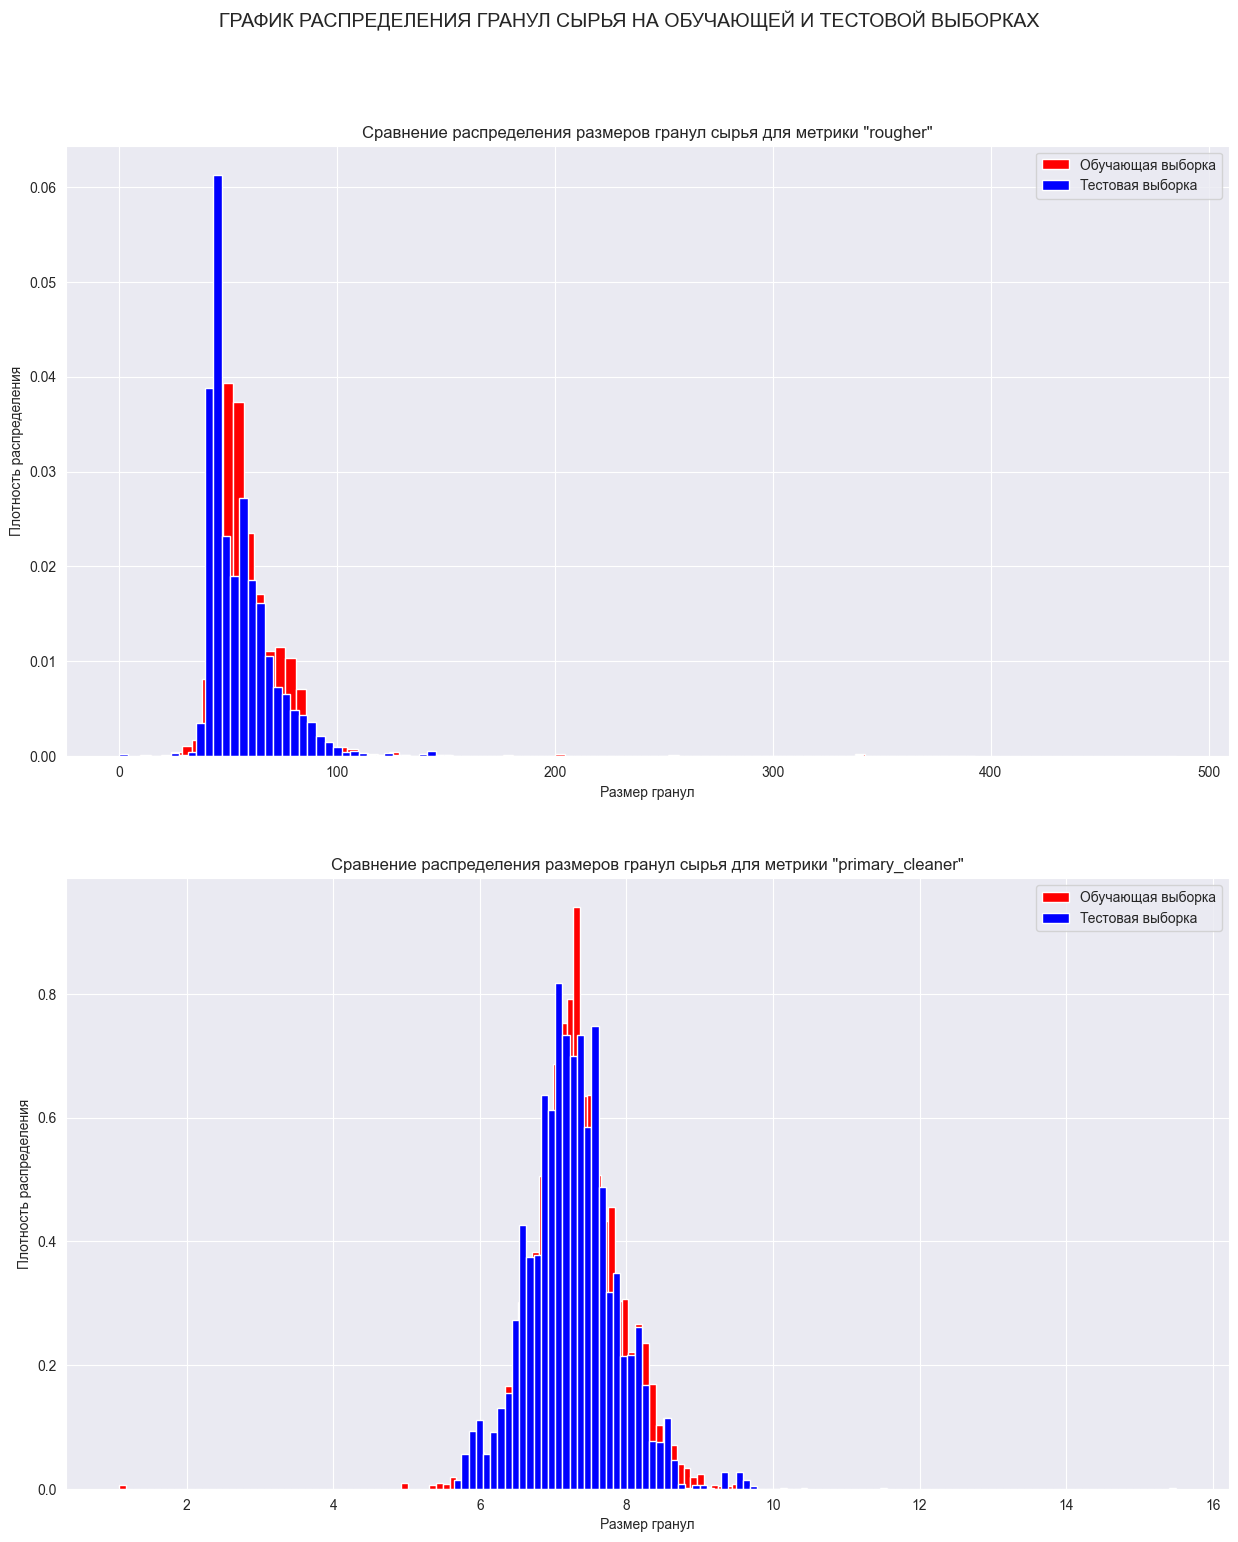

In [24]:
position = 0
plt.figure(figsize=[15, 17])
plt.subplots_adjust(top=0.90, wspace=0.2, hspace=0.2)
plt.suptitle('ГРАФИК РАСПРЕДЕЛЕНИЯ ГРАНУЛ СЫРЬЯ НА ОБУЧАЮЩЕЙ И ТЕСТОВОЙ ВЫБОРКАХ', fontsize=14)
for stage in ['rougher', 'primary_cleaner']:
    position += 1
    plt.subplot(2, 1, position)
    plt.title(f'Сравнение распределения размеров гранул сырья для метрики "{str(stage)}"', fontsize=12)
    sns.set_style('darkgrid')
    plt.hist(df_train[f'{stage}.input.feed_size'], bins=100, color='r', label='Обучающая выборка', density=True)
    plt.hist(df_test[f'{stage}.input.feed_size'], bins=100, color='b', label='Тестовая выборка', density=True)
    plt.xlabel('Размер гранул')
    plt.ylabel('Плотность распределения')
    plt.legend()
plt.show()

### Вывод
Таким образом, распределения размеров гранул сырья на обучающей и тестовой выборках совпадают, а значит оценка модели будет правильной.

Дополнительно: Проверим методом ttest, одинаковы ли средние значения распределения размеров гранул (на обучающей и тестовой выборках для этапа rougher)

In [25]:
stat, p_value = ttest_ind(df_train['rougher.input.feed_size'], df_test['rougher.input.feed_size'])
print(f"t-test: statistic={stat:.4f}, p-value={p_value:.4f}")

t-test: statistic=12.0882, p-value=0.0000


In [26]:
stat, p_value = ttest_ind(df_train['primary_cleaner.input.feed_size'], df_test['primary_cleaner.input.feed_size'])
print(f"t-test: statistic={stat:.4f}, p-value={p_value:.4f}")

t-test: statistic=5.6655, p-value=0.0000


<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> Тут не совсем верно интерпретирован результат: так как `p-value` ниже `alpha`, нулевая гипотеза отвергается. Ну тут мы проверяем схожесть распределения, в то время как тест проверяет равенство средних. Поэтому результаты теста могут быть ошибочно интерпретированы на наличие разницы, в то время как на графике мы её не видим.

1. Нулевая гипотеза отвергается в пользу альтернативной, если наблюдаемое на выборке значение оказывается слишком далеко от предполагаемого в нулевой гипотезе.
<ul><li>H0 - распределения схожи. А схожесть будем смотреть по равенству средних размеров частиц- предполагается равенство средних размеров частиц.</li>
<li>H1 (двусторонняя) - распределения отличаются (средние размеры частиц отличаются).</li>
</ul>
2. ttest выдал p-value около 0 (если не коруглять) - это вероятность получить текущие или ещё более существенные различия в среднем __случайно__, ведь с помощью теста мы оцениваем то, насколько статистически значима разница между выборками. То есть фактически тест говорит, что вероятность того, что между выборками текущая разница получена случайно - почти нулевая<br>
Соответственно вывод:<br>
<b>Мы проверяем схожесть распределения, в то время как тест проверяет равенство средних. Поэтому результаты теста могут быть ошибочно интерпретированы на наличие разницы, в то время как на графике мы её не видим.</b>

### Вывод
- Сравнили методом ttest размеры гранул сырья (на обучающей и тестовой выборках для этапа `rougher.input.feed_size`) - не отвергаем нулевую гипотезу об отсутствии различий в средних значениях распределения размеров гранул.
Следовательно модель будет корректно работать.

### Суммарная концентрация всех веществ на разных стадиях
Исследуем суммарную концентрацию всех веществ (металлы + sol) на разных стадиях: в сырье, в черновом и финальном концентратах, и запишем их в df_train для дальнейшего поиска аномалий. Наличие аномалий в тестовой выборки не испортит качество модели, в худшем случае модель вернет для них неверные предсказания. В этой связи удаляем аномалии из обучающей выборки.

In [27]:
for metric in CONCENTRATE_METRICS:
    df_train[metric] = 0
    for metal in METALS + ['sol']:
        df_train[metric] += df_train['{}_{}'.format(metric, metal)]
    
df_train[CONCENTRATE_METRICS].head(5)

,rougher.input.feed,rougher.output.concentrate,primary_cleaner.output.concentrate,final.output.concentrate
date,,,,
2016-01-15 00:00:00,51.680034,66.424950,72.640924,63.644396
2016-01-15 01:00:00,50.659114,67.012710,72.543485,63.957723
2016-01-15 02:00:00,50.609929,66.103793,72.095042,64.311180
2016-01-15 03:00:00,51.061546,65.752751,59.957723,63.573449
2016-01-15 04:00:00,47.859163,65.908382,71.321010,64.004667


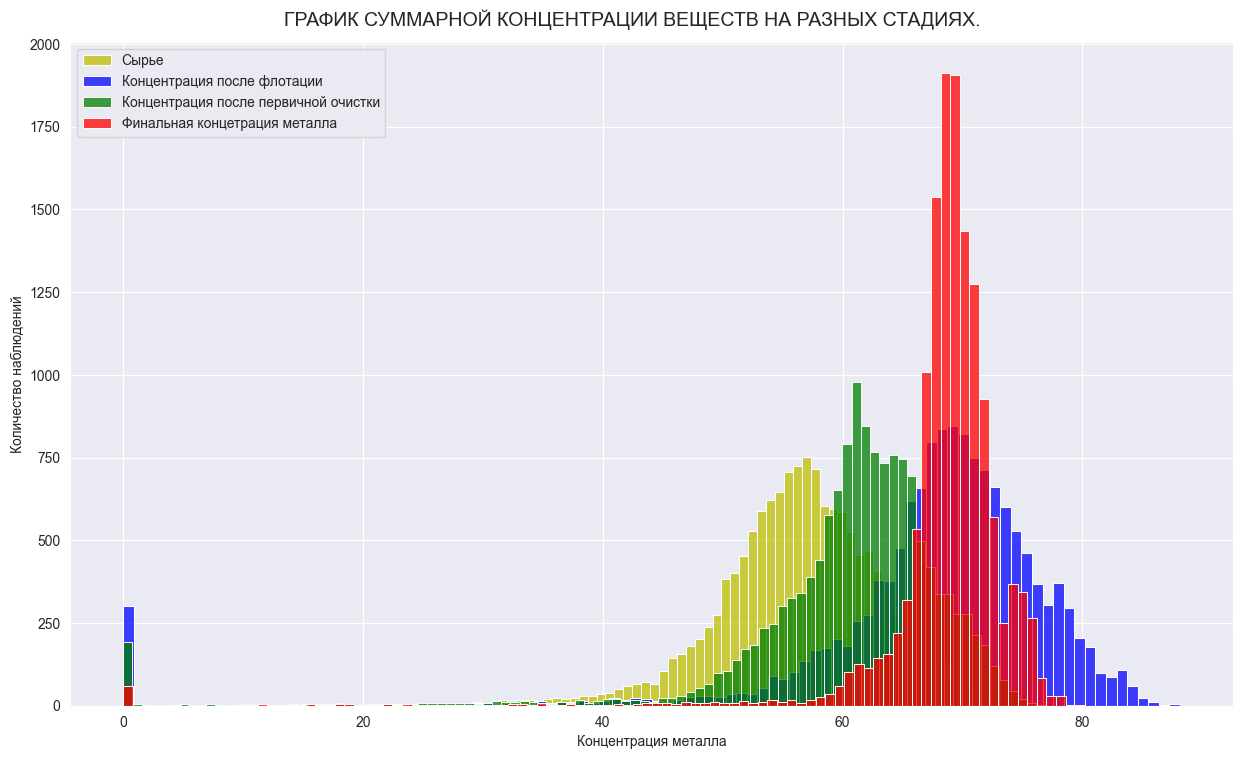

In [28]:
plt.figure(figsize=[15, 8])
plt.subplots_adjust(top=0.94, wspace=0.2, hspace=0.3)
plt.suptitle('ГРАФИК СУММАРНОЙ КОНЦЕНТРАЦИИ ВЕЩЕСТВ НА РАЗНЫХ СТАДИЯХ.', fontsize=14)
sns.set_style('darkgrid')
sns.histplot(df_train[f'rougher.input.feed'], bins=100, color='y', label='Сырье', kde=False)
sns.histplot(df_train[f'rougher.output.concentrate'], bins=100, color='b', label='Концентрация после флотации', kde=False)
sns.histplot(df_train[f'primary_cleaner.output.concentrate'], bins=100, color='g', label='Концентрация после первичной очистки', kde=False)
sns.histplot(df_train[f'final.output.concentrate'], bins=100, color='r', label='Финальная концетрация металла',kde=False)
plt.xlabel('Концентрация металла')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show()

### Вывод
- Видны значения где концентрацию получить не удалось (пики на нулевых значениях) или она крайне мала. Это аномалии и такие значения стоит удалить из всех выборок.
- Суммарная концентрация веществ увеличивается к финальному этапу, а диапазон распределения суммарной концентрации веществ уменьшается.
- Концентрация Au (золота) растет на протяжеии всех этапов и в конце становится в 5.3 раза больше, чем в начале
- Концентрация Ag (серебра) падает начиная с этапа флотации, в 1.6 раз
- Концентрация Pb (свинца) медленно растет на протяжении всех этапов очистки, в 2.8 раза

Определим класс, который посчитает границы нормальных значений (т.е Q1 - 1.5 * IQR и Q3 + 1.5 * IQR) и затем сможет нарисовать графики по ним.

In [29]:
NormalRange = namedtuple('NormalRange', ('min', 'max'))

class NormalRangeAnalyzer(object):
    MIN_VIEW_BOXPLOT_MUL = 0.8
    MAX_VIEW_BOXPLOT_MUL = 1.2
    
    def __init__(self, df, column_name):
        self._metrica = CONCENTRATE_METRICS_DSC[column_name]
        self._series = df[column_name]
        self._column_name = column_name
        self._normal_range = self._compute_normal_range()
    
    def _compute_normal_range(self):
        min_, q1, q3, max_ = self._series.quantile([0, 0.25, 0.75, 1])
        iqr = q3 - q1
        return NormalRange(max(min_, q1 - 1.5 * iqr), min(max_, q3 + 1.5 * iqr))
    
    @property
    def metrica(self):
        return self._metrica
    
    @property
    def column_name(self):
        return self._column_name
    
    @property
    def normal_range(self):
        return self._normal_range
    
    def describe(self):       
        print('Границы нормальных значений метрики "{}" ({}): {:.2f} ... {:.2f}'.format(
            self._metrica,
            self._column_name,             
            self._normal_range.min,
            self._normal_range.max,
        ))
        display(self._series.describe())
        
    def plot(self, bins=100):
        range_min = self._normal_range.min * self.MIN_VIEW_BOXPLOT_MUL
        range_max = self._normal_range.max * self.MAX_VIEW_BOXPLOT_MUL
        
        fig, axes = plt.subplots(nrows=1, ncols=2)
        
        self._series.plot(
            kind='box',
            ax=axes[0],
            grid=True,
            ylim=(range_min, range_max),
            figsize=(20,5),
        )
        
        self._series.plot(
            kind='hist', 
            ax=axes[1],
            bins=bins, 
            title=self._column_name,
            grid=True,
            figsize=(20,5),
        )
        
        plt.show()

Границы нормальных значений метрики "Сырье" (rougher.input.feed): 40.29 ... 73.05


count    14149.000000
mean        56.242170
std          7.029808
min          0.040000
25%         52.573579
50%         56.627635
75%         60.763234
max         74.458253
Name: rougher.input.feed, dtype: float64

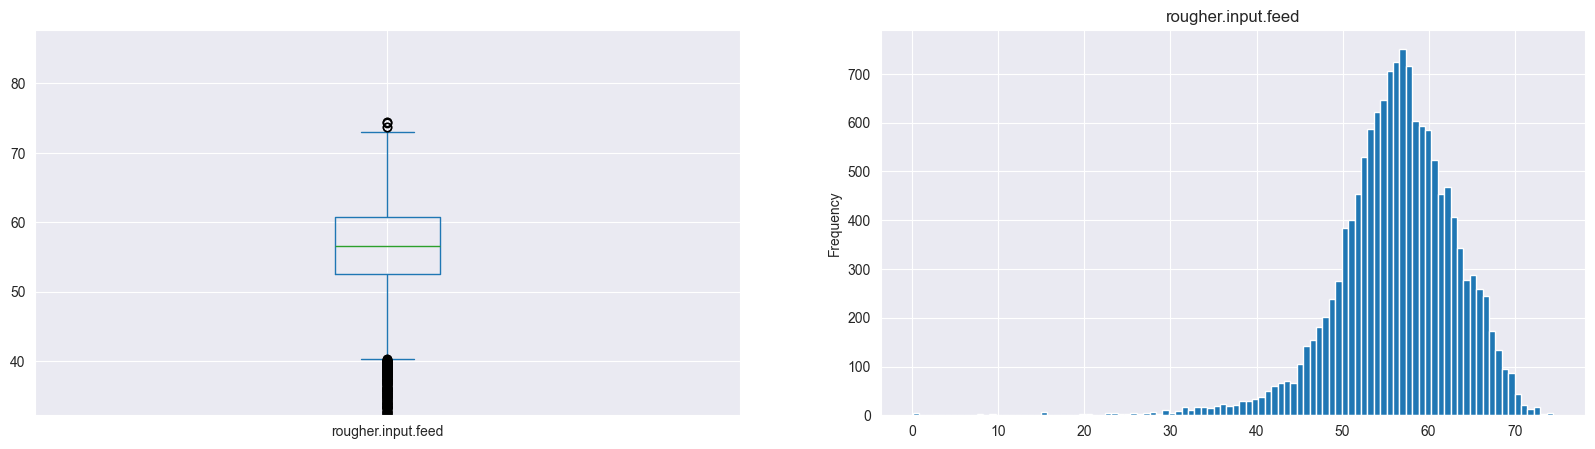

Границы нормальных значений метрики "Концентрация после флотации" (rougher.output.concentrate): 52.14 ... 86.20


count    14149.000000
mean        67.173145
std         12.713129
min          0.000000
25%         64.914390
50%         69.175663
75%         73.429261
max         88.140119
Name: rougher.output.concentrate, dtype: float64

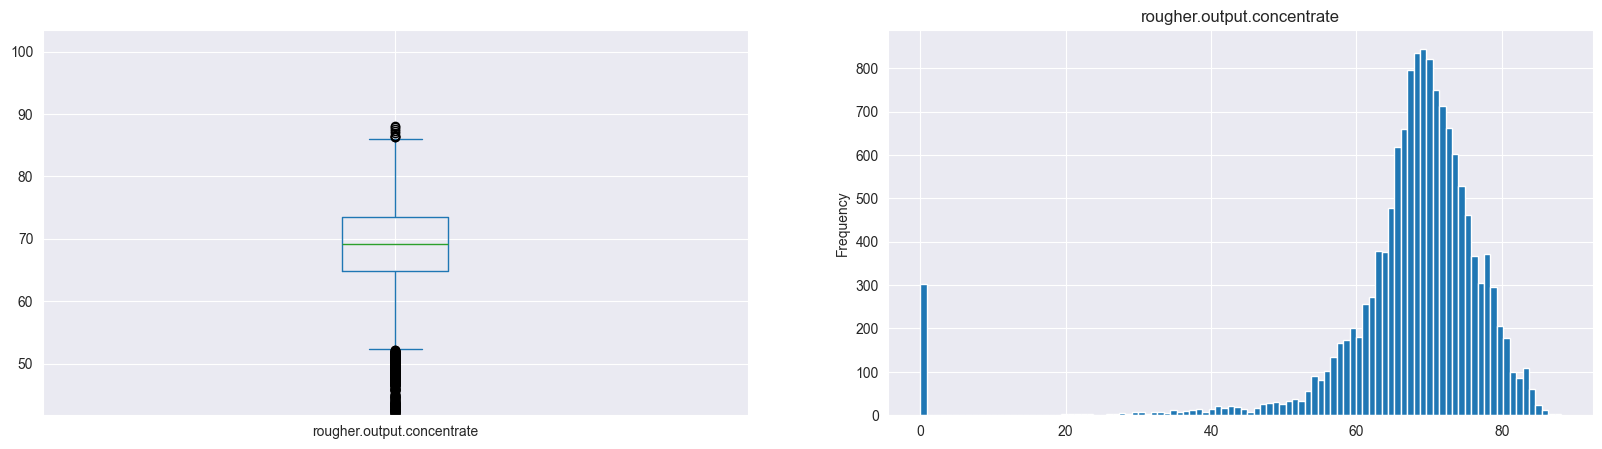

Границы нормальных значений метрики "Концентрация после первичной очистки" (primary_cleaner.output.concentrate): 47.08 ... 76.32


count    14149.000000
mean        60.172546
std         10.448165
min          0.000000
25%         58.046816
50%         61.786946
75%         65.355951
max         76.918076
Name: primary_cleaner.output.concentrate, dtype: float64

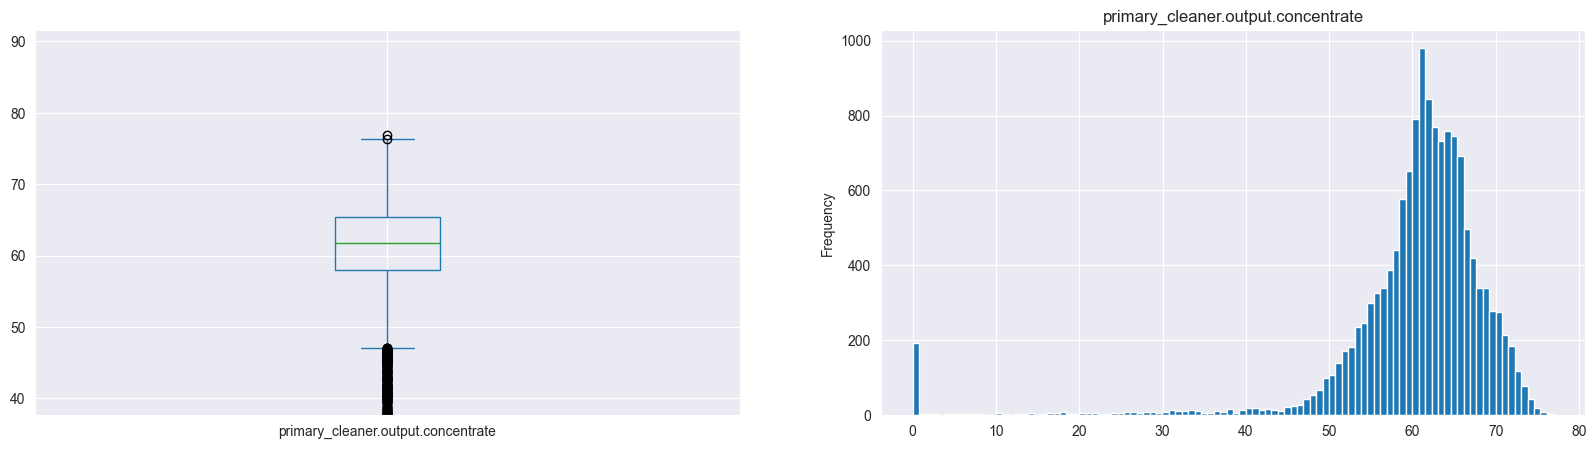

Границы нормальных значений метрики "Финальная концетрация металла" (final.output.concentrate): 62.44 ... 76.10


count    14149.000000
mean        68.387872
std          7.023723
min          0.000000
25%         67.559819
50%         69.141502
75%         70.974661
max         80.210644
Name: final.output.concentrate, dtype: float64

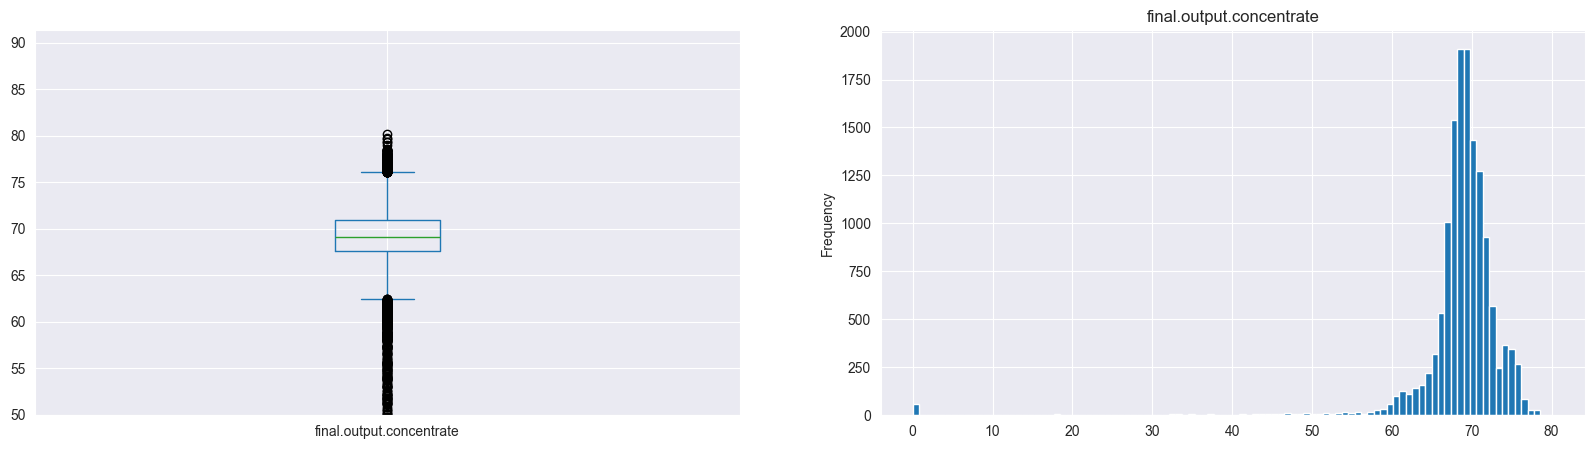

In [30]:
range_analyzers = []

for metric in CONCENTRATE_METRICS:
    range_analyzer = NormalRangeAnalyzer(df_train, metric)
    range_analyzer.describe() 
    range_analyzer.plot() 
    range_analyzers.append(range_analyzer)

Избавимся от аномальных данных в обучающей выборке.

In [31]:
print(df_train.shape)

for range_analyzer in range_analyzers:    
    df_train = df_train[
        (df_train[range_analyzer.column_name] >= range_analyzer.normal_range.min) & 
        (df_train[range_analyzer.column_name] <= range_analyzer.normal_range.max)
    ]
    
print(df_train.shape)

(14149, 90)
(11931, 90)


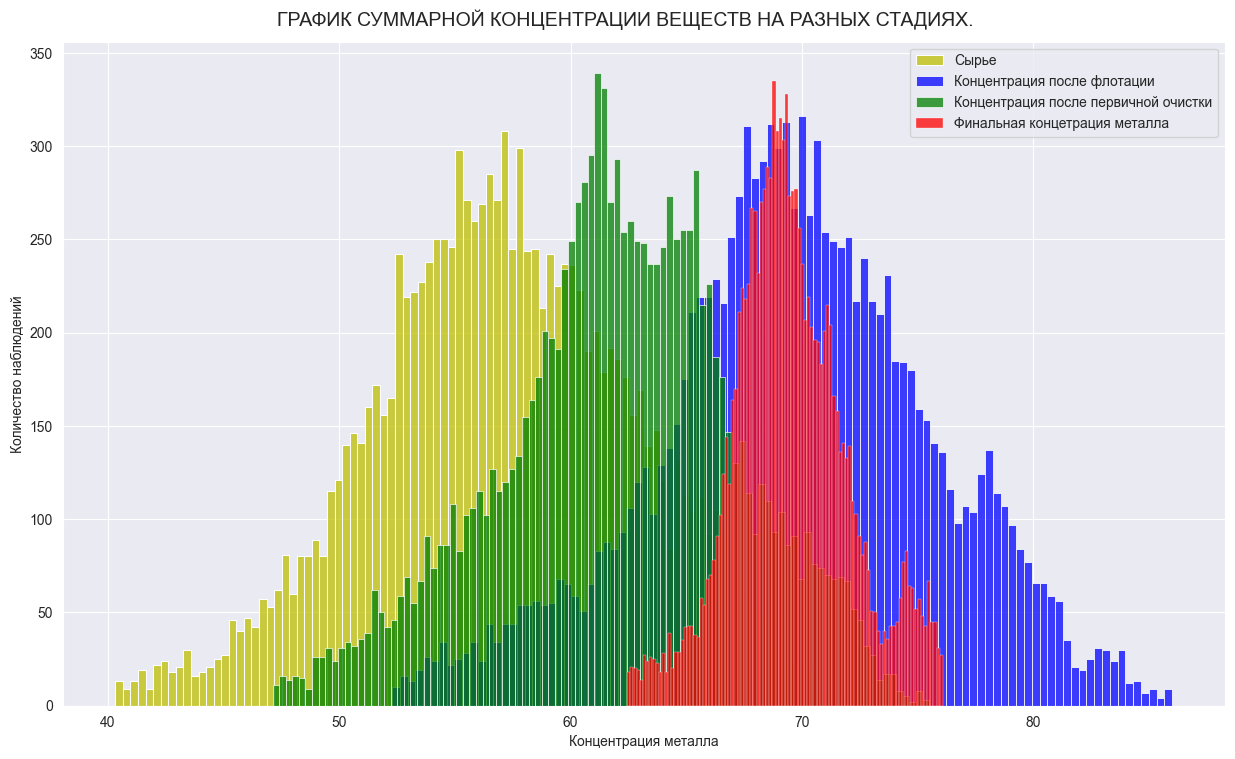

In [32]:
plt.figure(figsize=[15, 8])
plt.subplots_adjust(top=0.94, wspace=0.2, hspace=0.3)
plt.suptitle('ГРАФИК СУММАРНОЙ КОНЦЕНТРАЦИИ ВЕЩЕСТВ НА РАЗНЫХ СТАДИЯХ.', fontsize=14)
sns.set_style('darkgrid')
sns.histplot(df_train[f'rougher.input.feed'], bins=100, color='y', label='Сырье', kde=False)
sns.histplot(df_train[f'rougher.output.concentrate'], bins=100, color='b', label='Концентрация после флотации', kde=False)
sns.histplot(df_train[f'primary_cleaner.output.concentrate'], bins=100, color='g', label='Концентрация после первичной очистки', kde=False)
sns.histplot(df_train[f'final.output.concentrate'], bins=100, color='r', label='Финальная концетрация металла',kde=False)
plt.xlabel('Концентрация металла')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show()

#### Вывод
- Нашли и удалили 15.6% аномалий из обучающей выборки
- Суммарная концентрация веществ увеличивается к финальному этапу, а диапазон распределения суммарной концентрации веществ уменьшается.

### Подготовим датафреймы для прогнозирования features, target
Необходимо удалить из тренировочной выборки отсутствующие в тестовой выборке признаки (за исключением целевых признаков). В противном случае в ходе обучения будущих моделей может произойти утечка целевого признака. Она происходит, когда в признаки попадает информация о целевом признаке.

In [33]:
missing_test_fields = fields_diff(df_train, df_test)
print(missing_test_fields)
df_train = df_train.drop(missing_test_fields, axis='columns')
print(fields_diff(df_train, df_test))
print(fields_diff(df_test, df_train))

{'final.output.concentrate_pb', 'rougher.output.tail_pb', 'primary_cleaner.output.tail_au', 'rougher.output.concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.output.tail_ag', 'primary_cleaner.output.concentrate', 'rougher.output.concentrate_sol', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.concentrate_sol', 'final.output.tail_au', 'secondary_cleaner.output.tail_au', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'secondary_cleaner.output.tail_pb', 'final.output.tail_pb', 'final.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.tail_ag', 'final.output.concentrate', 'primary_cleaner.output.tail_sol', 'secondary_cleaner.output.tail_ag', 'rougher.output.tail_au', 'final.output.concentrate_sol', 'rougher.output.tail_sol', 'rougher.output.concentrate_ag', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.output.concentrate_pb', 'rougher.input.feed', 'primary

Отлично, теперь в обучающей и тестовой выборке одни и те же признаки.

## Выводы по анализу данных
- Анализ концентрации металлов показал, что концентрация золота значительно увеличивается на каждом этапе обработки сырья. Концентрация золота в отвалах тоже увеличивается, но при этом на порядок ниже, чем в сырье.
- На всех графиках концентрации сырья видны значения равные нулю. Судя по распределению, это выбросы, которые были удалены для улучшения качества будущих моделей прогнозирования.
- Построены графики распределения плотности вероятности значений размеров гранул на входе в этапы флотации и финальной очистки обучающей и тестовых выборок. Сами распределения похожи, что говорит об однородности данных размеров сырья в выборках.
- Исследована суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.
- Подготовлены датафреймы для прогнозирования features, target


##  Построение и обучение модели


### Функция для вычисления итоговой sMAPE

Вспомним формулы метрик качества:

$sMAPE= \frac{1}{N} \sum_{i=1}^{N} \frac {|y_i-\hat{y_i}|}{(|y_i|+|\hat{y_i}|)/2} \times 100\% $

$Итоговое\hspace{0.2cm}sMAPE = 25\% \times sMAPE(rougher) + 75\% \times sMAPE(final)$

In [34]:
# Напишем функции для вычисления sMAPE и Итоговой sMAPE.
def calculate_smape(target_actual, target_predictions):
    numerator = np.abs(target_actual - target_predictions)
    denominator = (np.abs(target_actual) + np.abs(target_predictions)) / 2 
    
    return 1 / len(target_actual) * np.sum(numerator / denominator) * 100 
    
    
def calculate_final_smape(target_actual, target_predictions):
    target_actual_rougher = target_actual['rougher.output.recovery']
    target_actual_final = target_actual['final.output.recovery']

    target_predictions_rougher = target_predictions[:, 0]
    target_predictions_final = target_predictions[:, 1]

    return 0.25 * calculate_smape(target_actual_rougher, target_predictions_rougher) \
        + 0.75 * calculate_smape(target_actual_final, target_predictions_final)

In [35]:
# Выделим фичи и целевые показатели rougher.output.recovery и final.output.recovery
# Примечание: Тестовая выборка будет использована для итоговой оценки.
X_test = df_test.drop(TARGETS, axis='columns')
y_test = df_test[TARGETS]

До обучения модели из исходного тренировочного датасета подготовим валидационную выборку.
Для этого разделим тренировочные данные на обучающую и валидационную выборки в пропорции 3 : 1 (75% : 25%).
В `sklearn` для этого предусмотрена функция `train_test_split`.
Зададим параметр random_state чтобы можно было воспроизвести это псевдослучайное разбиение данных.

In [36]:
features = df_train.drop(TARGETS, axis='columns')
target = df_train[TARGETS]

X_train, X_valid, y_train, y_valid = train_test_split(features,
                                                  target,
                                                  train_size=0.75,
                                                  random_state=RANDOM_FIX_NUMBER)

### Обучение различных моделей и оценка их качества

Вычислим показатель Итоговой sMAPE на основе простой модели прогнозов DummyRegressor, тогда качественная модель должна прогнозировать с ошибкой меньше этого значения.

In [37]:
dr = DummyRegressor(strategy='mean')
dr.fit(X_train, y_train)
y_pred = dr.predict(X_test)
result = calculate_final_smape(y_test, y_pred)
print(f'Итоговое sMAPE для DummyRegressor: {result}\n'
      f'У качественной модели ошибка должна быть меньше')

Итоговое sMAPE для DummyRegressor: 9.572891749221382
У качественной модели ошибка должна быть меньше


Теперь обучим различные модели и посмотрим, какая даёт лучшее значение Итоговой sMAPE.

Примечание: Оптимизацию гиперпарамтеров сделаем и на валидационной выборке, и кросс-валидации.

In [38]:
# Оптимизируем не менее 2 гиперпараметров для модели RandomForestRegressor:
start_time = time.time()
best_model = None
best_result = 100
for depth in range(2, 5):
    for est in tqdm(range(10, 21)):
        # модель с заданными глубиной и количеством деревьев
        rfc = RandomForestRegressor(max_depth=depth, n_estimators=est, random_state=RANDOM_FIX_NUMBER)
        # обучим модель на тренировочной выборке
        rfc.fit(X_train, y_train)
        # посчитаем качество модели на ВАЛИДАЦИОННОЙ выборке
        y_pred = rfc.predict(X_valid)
        result = calculate_final_smape(y_valid, y_pred)
        if abs(result) < abs(best_result):
            best_result = result # наилучшее значение метрики
            best_depth = depth # глубина
            best_est = est # количество деревьев
            best_model = rfc # наилучшая модель
elapsed_time = round(time.time() - start_time, 2)
print("Наименьшая симметричная средняя абсолютная ошибка (Итоговое sMAPE):", best_result)
print("Наиболее подходящая глубина:", best_depth)
print("Наиболее подходящее количество «деревьев»:", best_est)

100%|██████████| 11/11 [00:49<00:00,  4.46s/it]

Наименьшая симметричная средняя абсолютная ошибка (Итоговое sMAPE): 6.23518160625294
Наиболее подходящая глубина: 4
Наиболее подходящее количество «деревьев»: 19


In [39]:
# Создадим scorer для того, чтобы использовать его при кросс-валидации
smape_scorer = make_scorer(calculate_final_smape, greater_is_better=False)

###  Дерево решений DecisionTreeRegressor

In [40]:
param_grid = {'max_depth': range(2, 11)}

model = DecisionTreeRegressor(random_state=RANDOM_FIX_NUMBER)
search = GridSearchCV(model, param_grid, cv=5, scoring=smape_scorer)
search.fit(X_train, y_train)
print('Лучшее значение Итоговой sMAPE для DecisionTreeRegressor: {} при значениях гиперпараметров: {}'.format(-search.best_score_, search.best_params_))

Лучшее значение Итоговой sMAPE для DecisionTreeRegressor: 5.800282025445151 при значениях гиперпараметров: {'max_depth': 10}


###  Случайный лес RandomForestRegressor

In [41]:
param_grid = {'n_estimators': range(20, 31, 10),
              'max_depth': range(2, 4)}

model = RandomForestRegressor(random_state=RANDOM_FIX_NUMBER)
search = GridSearchCV(model, param_grid, cv=5, scoring=smape_scorer)
search.fit(X_train, y_train)
print('Лучшее значение Итоговой sMAPE для RandomForestRegressor: {} при значениях гиперпараметров: {}'.format(-search.best_score_, search.best_params_))

Лучшее значение Итоговой sMAPE для RandomForestRegressor: 6.63145286962839 при значениях гиперпараметров: {'max_depth': 3, 'n_estimators': 30}


###  Линейная регрессия LinearRegression

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)
final_smape = cross_val_score(model, X_train, y_train, cv=5, scoring=smape_scorer).mean()
print('Лучшее значение Итоговой sMAPE для LinearRegression:', -final_smape)

Лучшее значение Итоговой sMAPE для LinearRegression: 6.439957760815956


Все полученные модели ненамного но лучше, чем DummyRegressor, предсказывающая среднее значение.

In [45]:
# По итогу оценок на кросс-валидации нужно оценить налучшую модель на тестовой выборке:
final_model = RandomForestRegressor(n_estimators=16, max_depth=2, random_state=RANDOM_FIX_NUMBER)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
result = calculate_final_smape(y_test, y_pred)
print(f'Итоговое sMAPE для RandomForestRegressor: {result}')

Итоговое sMAPE для RandomForestRegressor: 8.824957147927943


## Выводы по построению и обучению модели
- Модель RandomForestRegressor даёт наилучшее значение Итоговой sMAPE среди других моделей.
- На тестовой выборке RandomForestRegressor предсказывает значения целевых признаков `rougher.output.recovery` и `final.output.recovery` с Итоговой sMAPE 8.56%

## Итоговый вывод
- В ходе изучения данных подтверждена корректность рассчётов эффективности обогащения, так как различия между расчётными и истинными значениями крайне малы.
- Большинство признаков имеют нормальное распределение, но вместе с тем встречаются и скошенные распределения. В данных найдены пропуски и аномалии, дубликаты отсутствуют.
- В тестовой выборке некоторые параметры, необходимые для рассчета итоговой метрики качества, отсутствуют, так как в тестовой выборке присутствуют только те параметры техпроцесса, которые мы можем получить непосредственно в ходе процесса или по его окончании. В этой связи были добавлены `rougher.output.recovery`, `final.output.recovery`. 
- Отсутствующие значения в тренировочной и тестовой выборках заполнены значениями соседними по времени с помощью стратегии заполнения `forward fill` (функция ffill заполняет пропуски предпоследним значением признака, значения даты расположены по возрастанию).
- Исследована концентрация металлов на разных стадиях обработки, проанализирована динамика концентрации в зависимости от этапа техпроцесса:
    - избавились от 15.6% аномалий из обучающей выборки
    - Концентрация Au (золота) растет на протяжеии всех этапов и в конце становится в 5.3 раза больше, чем в начале
    - Концентрация Ag (серебра) падает начиная с этапа флотации, в 1.6 раз
    - Концентрация Pb (свинца) медленно растет на протяжении всех этапов очистки, в 2.8 раза
    - Суммарная концентрация веществ увеличивается к финальному этапу, а диапазон распределения суммарной концентрации веществ уменьшается.
- Убедились визуально и статистически, что распределения размеров гранул сырья на обучающей и тестовой выборках совпадают, а следовательно модель будет корректно работать.
- Определена наилучшая модель по предсказанию коэффицента восстановления золота из золотосодержащей руды - это модель `RandomForestRegressor` при n_estimators=16 и max_depth=2, которая на тестовой выборке предсказывает значения целевых признаков `rougher.output.recovery` и `final.output.recovery` с Итоговой sMAPE 8.56%

